# Week3授業課題 信用情報を分析しよう

# 1.この課題の目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

# 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

# 【問題1】コンペティション内容の把握
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？



## このコンペティションでは何を予測する？
- どのようなデータか？　→　ローンを利用し完済または完済できなかった307511人分の債務者の個人情報(特徴量120個)である。
- 何を予測する？　→　それぞれの債務者の各特徴量から、ローンを完済できる確率を予測する。

## 目的変数は？
- application_train.csv のデータの中の左から２列目の「TARGET」が目的変数であり、ローンの完済ができた場合は「0」、完済できなかった場合は「1」が入力されている。

## 企業がこのコンペティションを開催することで得られるメリットは？
- 企業側は必要な情報を入力する事で、新たにローンを組もうとしている人に対して、ローンを完済できる確率がどの程度がを事前に確認でき、不良債権の発生を未然に防ぐことができる。

## データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？
- 債務者のローンの総額、収入、貯金　→　ローンの総額が高く、収入や貯金が低い場合は完済できない可能性が高くなると予想される。

# 3.データセットの準備
データセットはKaggleのページからapplication.csvをダウンロードしてください。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

# 【問題2】データの概観
データの概観を把握してください。

（例）
- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す


 コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

### データを表示
- 特徴量の個数→特徴量の個数は120個(3列目〜122列目)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import scipy
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
%matplotlib inline

pd.set_option('display.max_rows', 200)

# テストデータを読み込み、先頭から５行のみ表示
df = pd.read_csv('application_train.csv') # train.csvをデータフレーム形式で読み込んで表示
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### infoメソッド
- 行数　307511 列数 122
- データタイプ　float64(65行), int64(41行), object(16行)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### クラスごとのデータ数をグラフに出す

In [3]:
# 債務不履行の人のデータの個数
number_of_1 = (df.loc[:,'TARGET']==1).sum()
number_of_1

24825

In [4]:
# 債務完済した人のデータ数の個数
number_of_0 = (df.loc[:,'TARGET']==0).sum()
number_of_0

282686

In [5]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

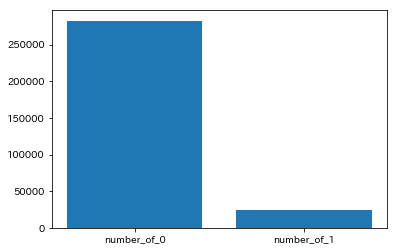

In [6]:
# barメソッドを使用し、棒グラフで表示
plt.bar([1,2], [number_of_0, number_of_1], 
             tick_label=['number_of_0', 'number_of_1'])

### describeメソッド

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 欠損値の有無を確認
### →欠損値有り

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
## ①課題
- 欠損値の割合を確認するとnull値になるカラムがかなりあると同時に欠損値の割合を見ると7０％から４０％の物が多いので
- 単純に欠損値があるからとカラムを削除して良いのだろうかと疑問が残る実際に欠損値があるカラムを削除するとカラム数が122から５７カラムにまで減る
- 扱うデータがアプリケーション訓練データだけで肝心のクレジットビューローのデータ分析を考慮していないので相関関係がダイレクトに作用しないのではと考えられる
- リアルタイムでの経済状況を特徴量に盛り込んでいないので、突発の経済問題等に対応できない

## ②疑問
- 欠損値の補完を行う際はどの値で補完すれば、よりよい精度の学習モデルが作成できるのか？
- 欠損値は補完ではなく削除をした方が精度が向上するか？


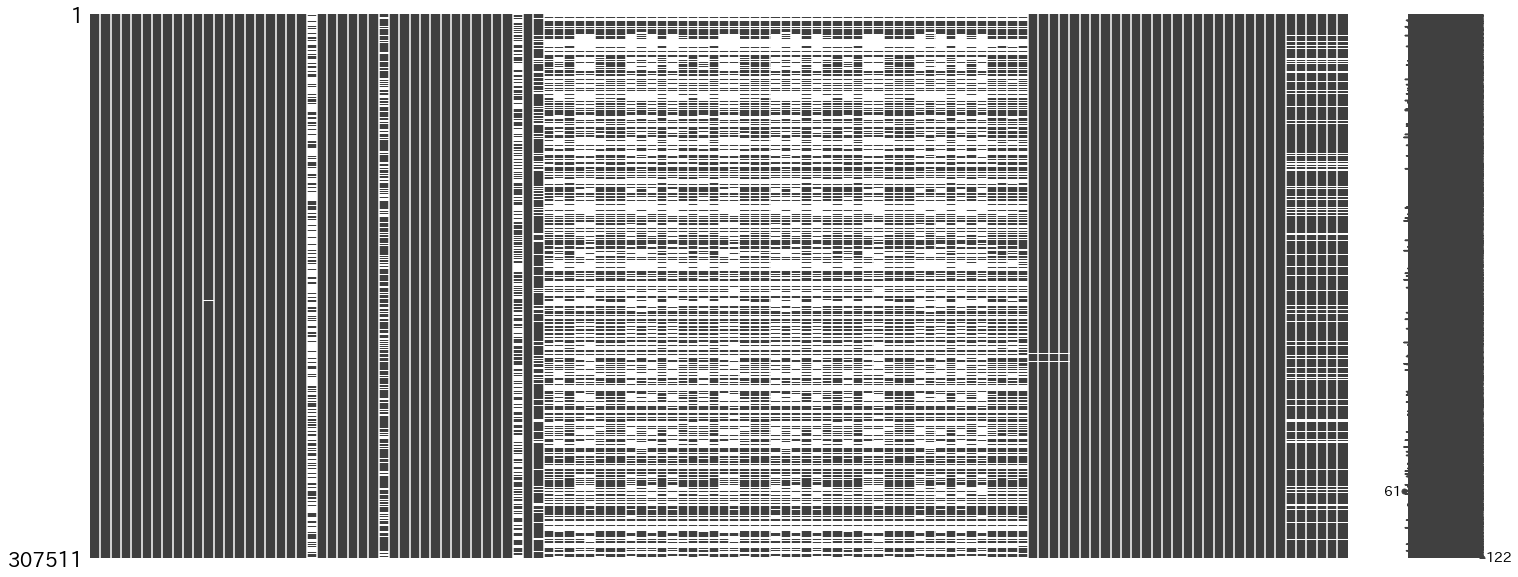

In [8]:
msno.matrix(df)

In [9]:
# isnullメソッドとsumメソッドの組み合わせで各列の欠損値の数を表示
df1 = pd.DataFrame({
                        'total' : len(df),
                        'missing_ratio' : df.isnull().sum()/len(df)
                        })
df1.sort_values('missing_ratio',ascending=False)

,total,missing_ratio
COMMONAREA_MEDI,307511,0.698723
COMMONAREA_AVG,307511,0.698723
COMMONAREA_MODE,307511,0.698723
NONLIVINGAPARTMENTS_MODE,307511,0.694330
NONLIVINGAPARTMENTS_AVG,307511,0.694330
NONLIVINGAPARTMENTS_MEDI,307511,0.694330
FONDKAPREMONT_MODE,307511,0.683862
LIVINGAPARTMENTS_MODE,307511,0.683550
LIVINGAPARTMENTS_AVG,307511,0.683550
LIVINGAPARTMENTS_MEDI,307511,0.683550


# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

### 特徴量の重要度の算出

- カテゴリカル変数をワンホットエンコーディング

In [10]:
#デフォルトでは欠損値NaNは除外して処理される。
#NaNも一つのカテゴリーとしてダミー変数化したい場合は、引数dummy_na=Trueとする。ここで重要なのは,dummy_na=Trueはカテゴリ変数のNaNだけを０に変換し
#数値型のカラムのNaNは０に変換しない。
df_dummies = pd.get_dummies(df,dummy_na=True)
df_dummies = df_dummies.fillna(0)
df_dummies

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,1,0,0,1,0,0
1,100003,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,1,0,0,1
3,100006,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,1,0,0,1
4,100007,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,1,0,0,1
5,100008,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,1,0,0,1
6,100009,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,1,0,0,1
7,100010,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,1,0,0,1
8,100011,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,1,0,0,1
9,100012,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,1,0,0,1


In [11]:
#　学習データのみを抽出
X_train = df_dummies.drop(['SK_ID_CURR', 'TARGET'], axis=1)
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,1,0,0,1,0,0
1,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,1,0,0
2,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,1,0,0,1
3,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,1,0,0,1
4,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,1,0,0,1
5,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,...,0,0,0,0,0,0,1,0,0,1
6,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,-619,...,0,0,0,0,0,0,1,0,0,1
7,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,0,0,0,0,0,0,1,0,0,1
8,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,-3514,...,0,0,0,0,0,0,1,0,0,1
9,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019,-14437.0,-3992,...,0,0,0,0,0,0,1,0,0,1


In [12]:
y_train = df_dummies.loc[:,'TARGET']
y_train

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        1
41        0
42        1
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        1
82        0
83  

In [13]:
df_dummies.isnull().sum().sum()

0

- ランダムフォレストモデルで学習モデルを作成

In [14]:
# RandomForestClassifierメソッドをインポート
from sklearn.ensemble import RandomForestClassifier

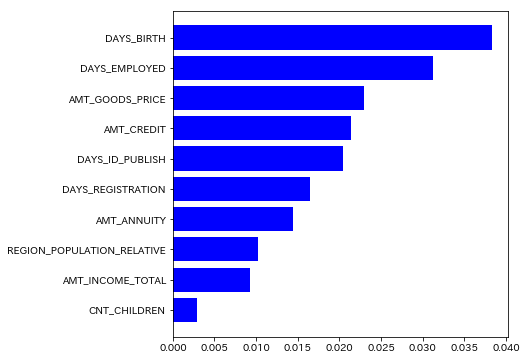

In [15]:
# RandomForestClassifier　モデルを作成　(決定木の数は　100、深度は10)
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)

# 学習
clf.fit(X_train, y_train)

features = X_train.columns

importances = clf.feature_importances_[:10]

#　argsortメソッドで重要度をソートしたもののインデックスを抽出
sort_importance_index = np.argsort(clf.feature_importances_[:10])


plt.figure(figsize=(6,6))
plt.barh(range(len(sort_importance_index )), importances[sort_importance_index ], color='b', align='center')
plt.yticks(range(len(sort_importance_index )), features[sort_importance_index ])
plt.show()

### 散布図行列の作成

In [16]:
# seabornメソッドをインポート
import seaborn as sns

In [17]:
#重要度のカラムを出力
features[sort_importance_index ]

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_BIRTH'],
      dtype='object')

In [18]:
df_columns = df_dummies.columns
df_for_plot = df_dummies[['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_CREDIT','DAYS_ID_PUBLISH']]

/anaconda3/envs/DIC/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


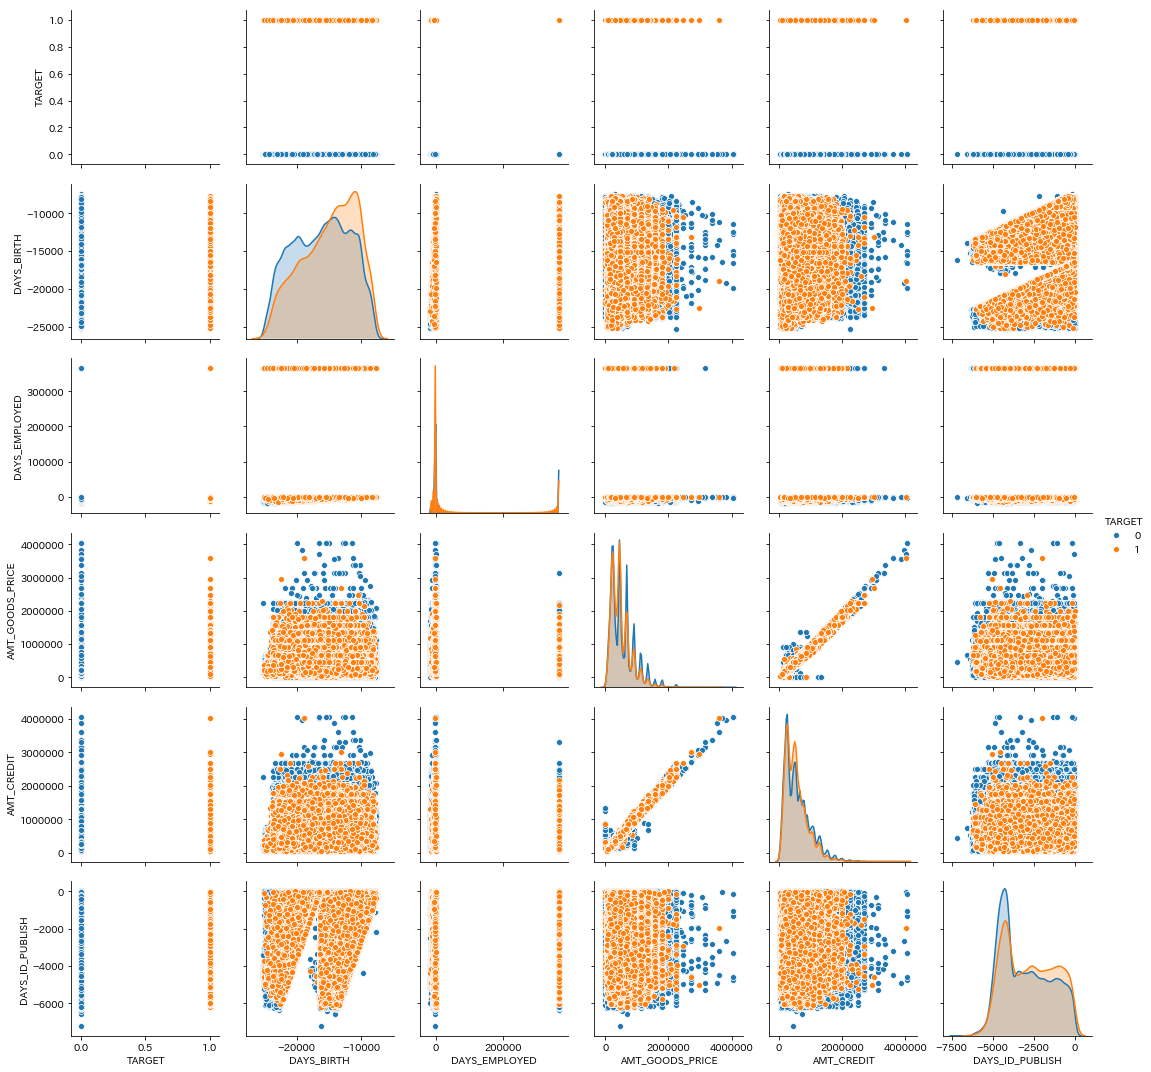

In [19]:
sns.pairplot(df_for_plot, hue='TARGET')

In [20]:
#ランダムフォレスト で重要度を出し上位５つの中でさらに相関係数を出し分析する
df_for_plot.corr()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_ID_PUBLISH
TARGET,1.000000,0.078239,-0.044932,-0.039565,-0.030369,0.051457
DAYS_BIRTH,0.078239,1.000000,-0.615864,-0.053943,-0.055436,0.272691
DAYS_EMPLOYED,-0.044932,-0.615864,1.000000,-0.064419,-0.066838,-0.272378
AMT_GOODS_PRICE,-0.039565,-0.053943,-0.064419,1.000000,0.986687,-0.009419
AMT_CREDIT,-0.030369,-0.055436,-0.066838,0.986687,1.000000,-0.006575
DAYS_ID_PUBLISH,0.051457,0.272691,-0.272378,-0.009419,-0.006575,1.000000


考察  
与信額(AMT_CREDIT)とローン商品の限度額(AMT_GOODS_PRICE)を見るとローンを完済していない人は当然与信度が低く借りれる額も少ない。それなのに完済出来ていない。

考察  
DAYS_EMPLOYEDとDAYS_BIRTHは負の相関が−６と割合高いが図を見ると高齢者ほど返済率が低く高齢者の雇用の問題が出ている。

/anaconda3/envs/DIC/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


歪度 -0.001200229222216958
尖度 -1.1989877943832548


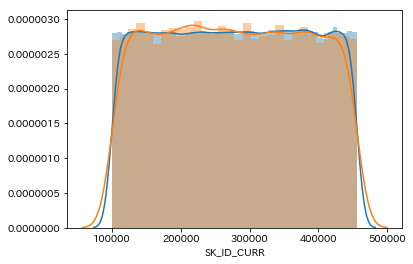

/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/DIC/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


歪度 3.0781436510283156
尖度 7.474968336365922


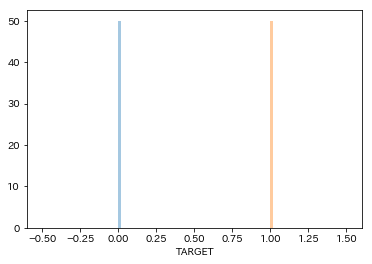

歪度 1.9745948378093714
尖度 7.903958330212626


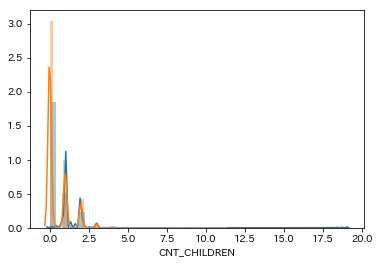

歪度 391.55774412283097
尖度 191783.43600648205


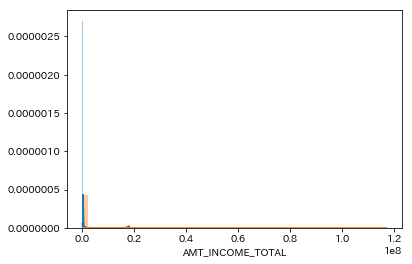

歪度 1.234772474032497
尖度 1.9339903428408523


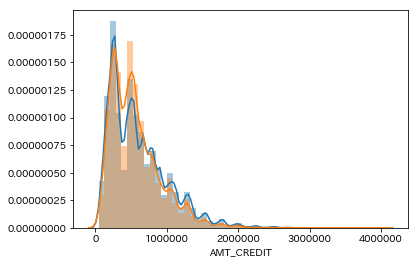

歪度 1.579440700854367
尖度 7.705608596200369


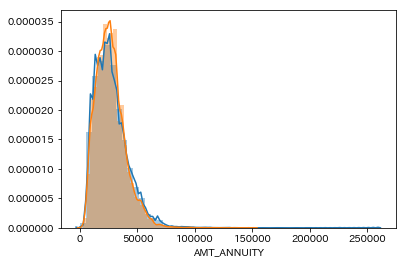

歪度 1.3468831914020332
尖度 2.427108881468625


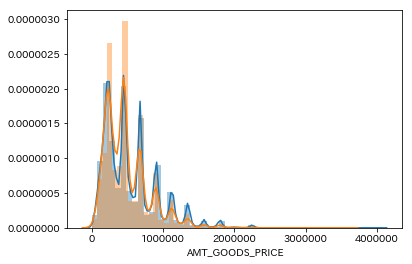

歪度 1.4880012623794308
尖度 3.2599928158224447


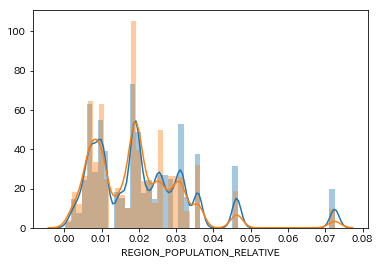

歪度 -0.11567274746102389
尖度 -1.049128223112004


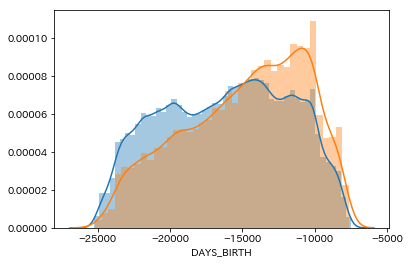

歪度 1.6643380795860176
尖度 0.7715803231880582


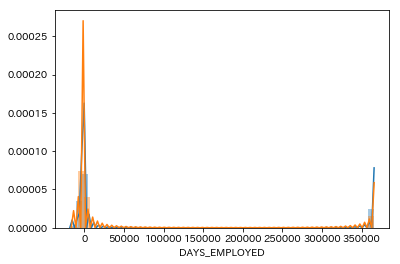

歪度 -0.5908687335336363
尖度 -0.32136088843633237


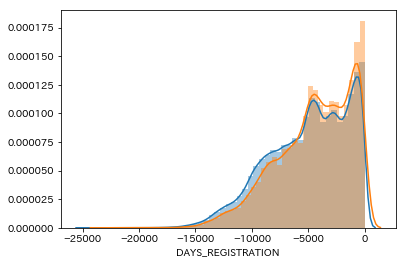

歪度 0.349325789225092
尖度 -1.1068094092801735


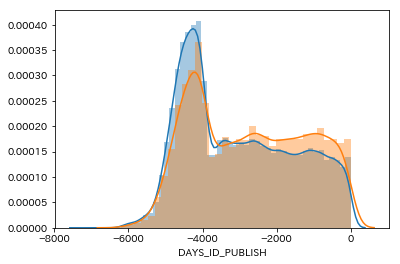

歪度 3.9323618374254528
尖度 20.55795754997556


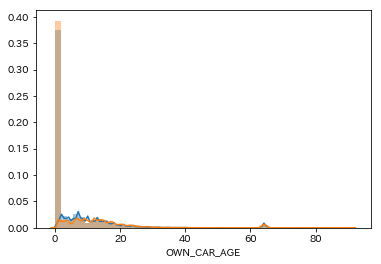

歪度 -554.5340386335657
尖度 307506.0000032519


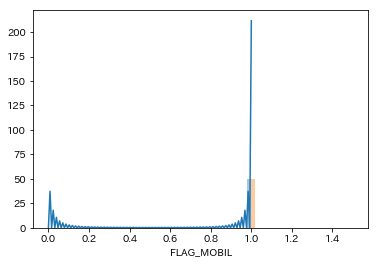

歪度 -1.6648783404534215
尖度 0.7718198885109437


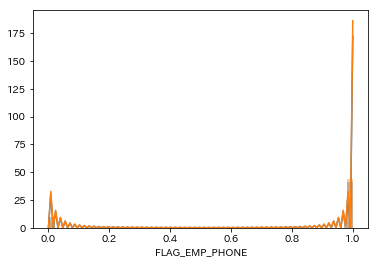

歪度 1.5049425532424379
尖度 0.26485208855986864


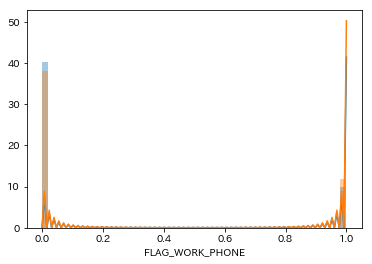

歪度 -23.081059758337734
尖度 530.7353195679573


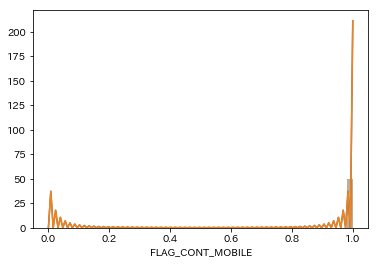

歪度 0.9740777775392261
尖度 -1.0511724833042424


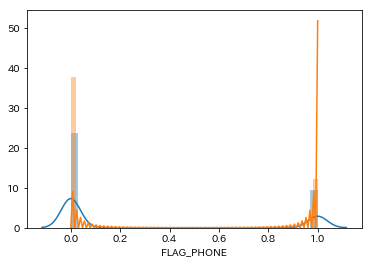

歪度 3.8328344790010034
尖度 12.690620143418904


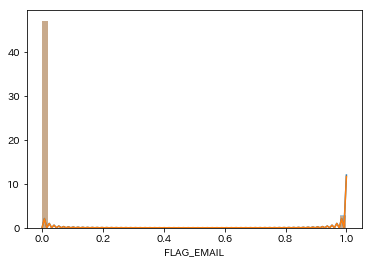

歪度 0.9874476016246942
尖度 2.801791739407383


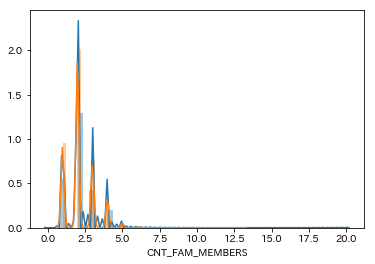

歪度 0.08746792304913137
尖度 0.8003839116596194


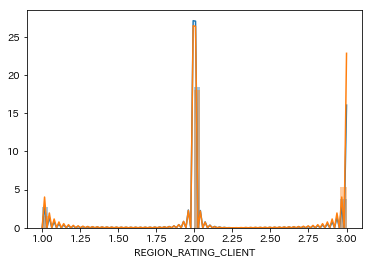

歪度 0.059729520794557595
尖度 0.9335491392941111


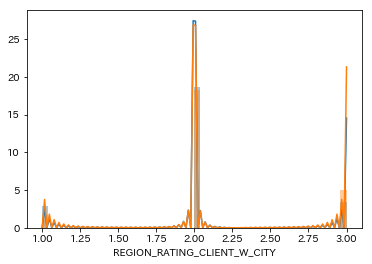

歪度 -0.028024322760699688
尖度 -0.1941892198090649


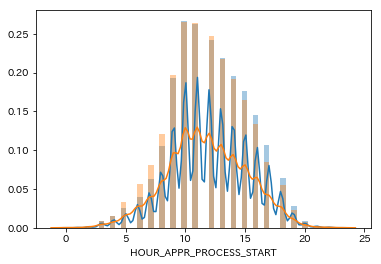

歪度 7.940237521184951
尖度 61.04737189283331


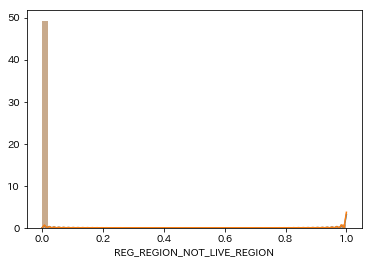

歪度 4.09274678347473
尖度 14.750576233642757


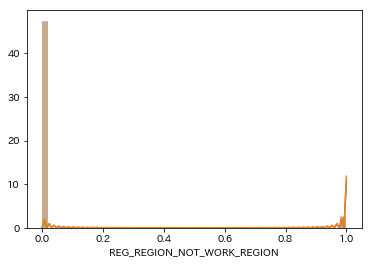

歪度 4.651597479036471
尖度 19.63735910697844


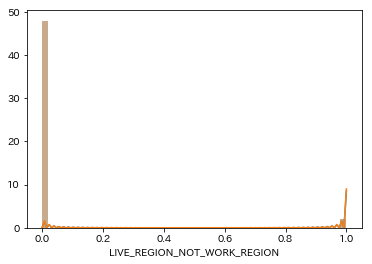

歪度 3.142765196713042
尖度 7.876973081670778


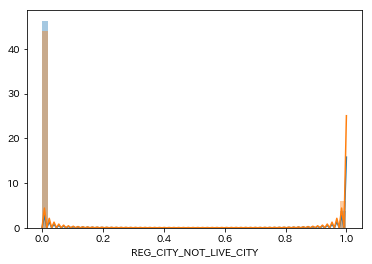

歪度 1.280131260849252
尖度 -0.36126395499650465


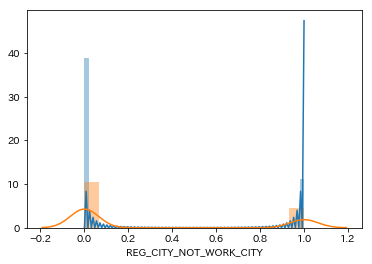

歪度 1.6697868495877215
尖度 0.7881881230560874


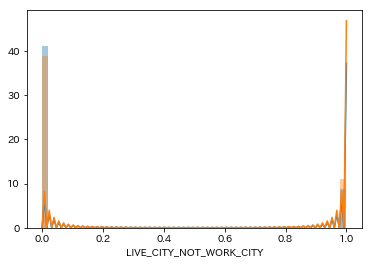

歪度 0.8689527962970295
尖度 -0.7555101872006418


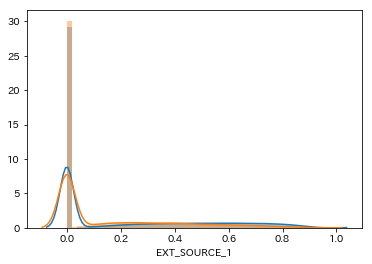

歪度 -0.800078379469295
尖度 -0.25523564483732253


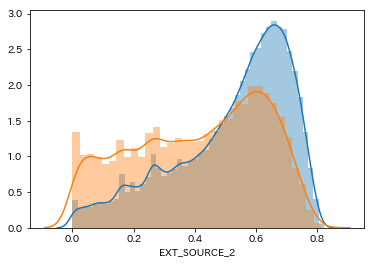

歪度 -0.30945104180987865
尖度 -1.2110593805176622


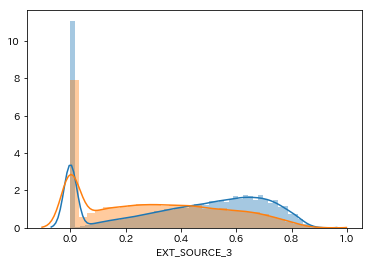

歪度 3.0372046973283697
尖度 14.669968564055573


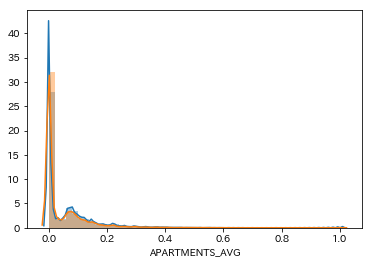

歪度 3.996524316834779
尖度 31.8247214813766


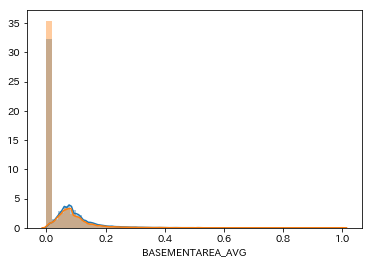

歪度 -0.04043728567778952
尖度 -1.9972425500664353


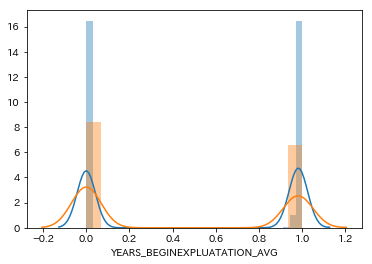

歪度 0.7918231908047616
尖度 -1.259401529235553


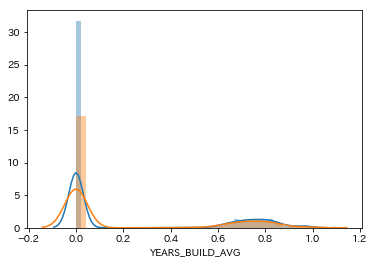

歪度 8.890724283627055
尖度 124.180967984093


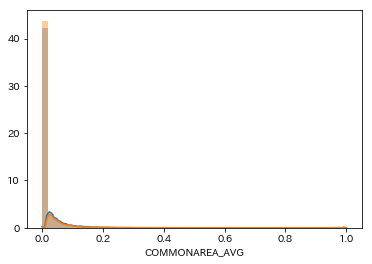

歪度 3.846911359059153
尖度 19.203333080162032


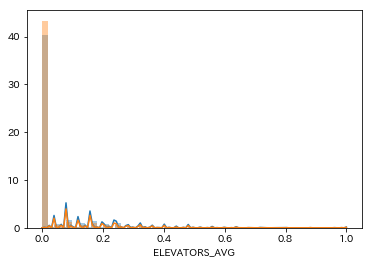

歪度 2.136464987933004
尖度 8.5072894688546


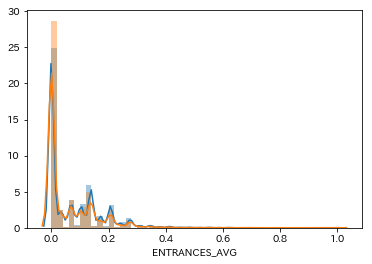

歪度 1.5175229715284249
尖度 2.5165230250060944


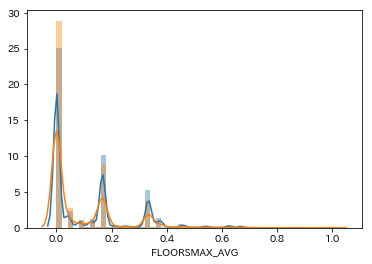

歪度 2.1795237546607855
尖度 4.96491323588312


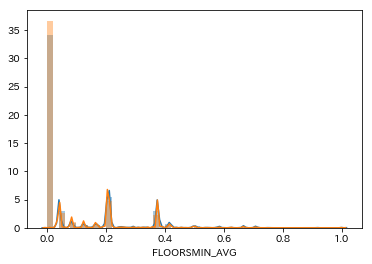

歪度 5.680921436855997
尖度 57.44560835673009


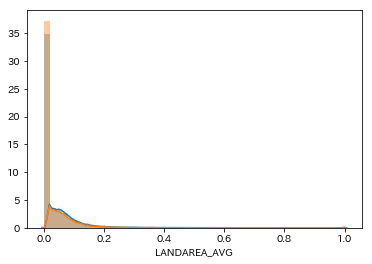

歪度 4.086705208034693
尖度 28.062824998082444


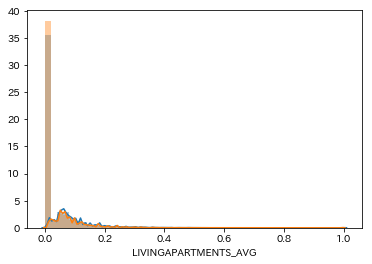

歪度 3.4212528370189794
尖度 17.74427824535466


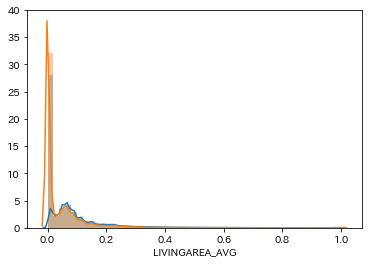

歪度 27.815256164571608
尖度 920.4512993509686


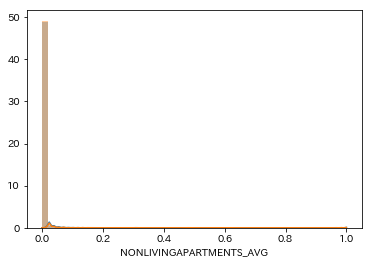

歪度 9.476834721020333
尖度 135.7338125479772


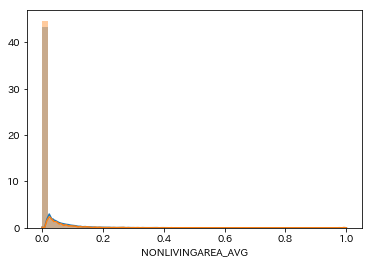

歪度 3.136316495610206
尖度 15.524379381628329


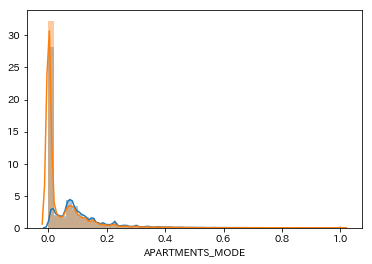

歪度 4.0371392008233675
尖度 31.701402544510927


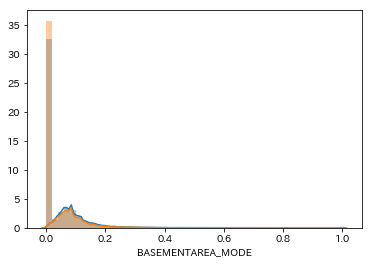

歪度 -0.03949560877464864
尖度 -1.9977734152370918


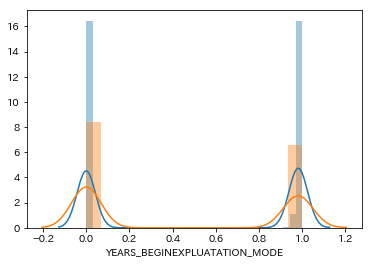

歪度 0.7853655848730167
尖度 -1.2772779452852543


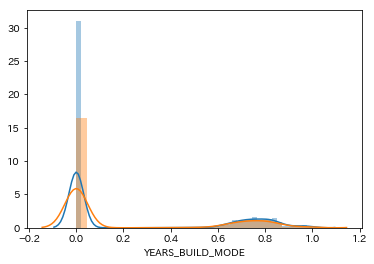

歪度 9.19500586441782
尖度 133.0093307693737


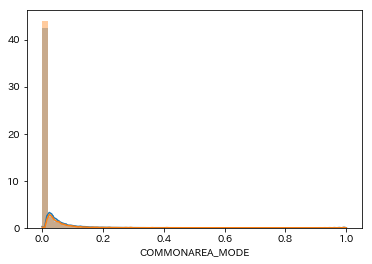

歪度 4.004257440752385
尖度 20.83838302890989


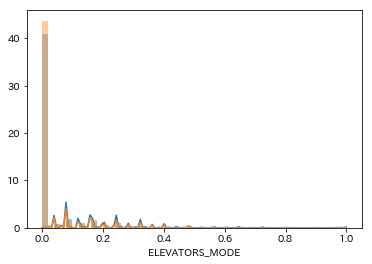

歪度 2.2265763726197174
尖度 9.103324588921323


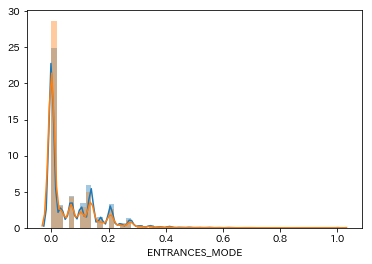

歪度 1.542275678958951
尖度 2.6544217740358302


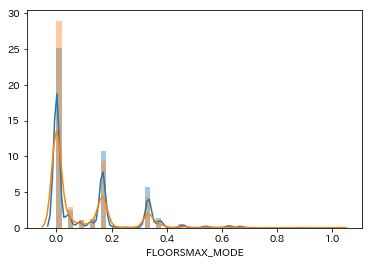

歪度 2.2056917121931128
尖度 5.121165647249299


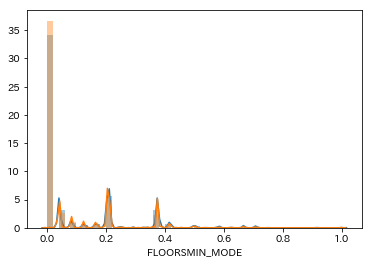

歪度 5.69162926241563
尖度 56.81584243993372


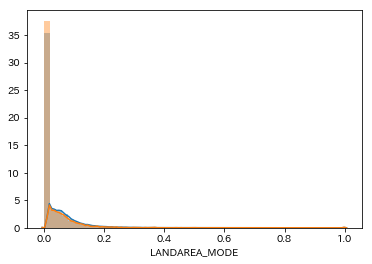

歪度 4.01046186150799
尖度 25.77473811874202


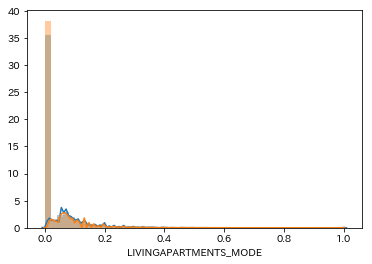

歪度 3.5123488252650588
尖度 18.40873314403244


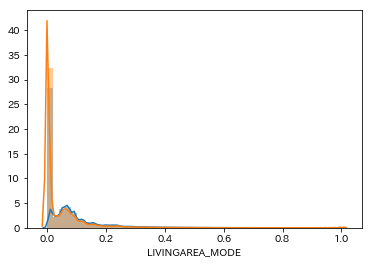

歪度 29.125948450984517
尖度 1003.0860795871234


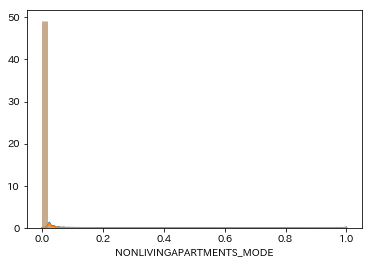

歪度 9.510295723859437
尖度 134.62157398295236


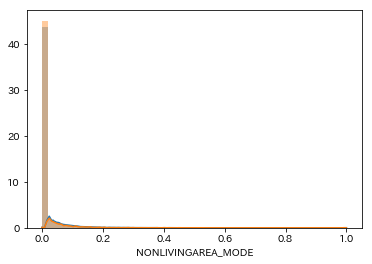

歪度 3.0447104709361867
尖度 14.62128186605263


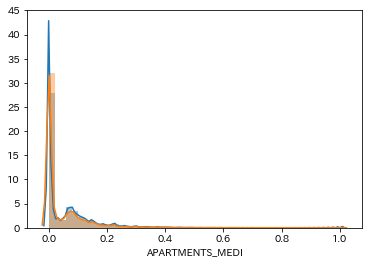

歪度 3.994598372364663
尖度 31.812710872526736


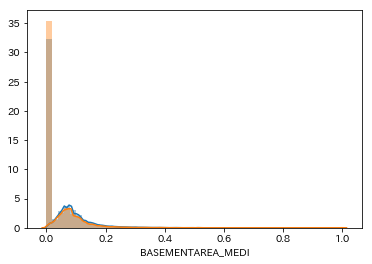

歪度 -0.040465318322740265
尖度 -1.9974131783095026


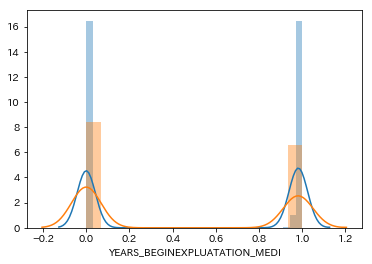

歪度 0.7893441377169915
尖度 -1.266070789679526


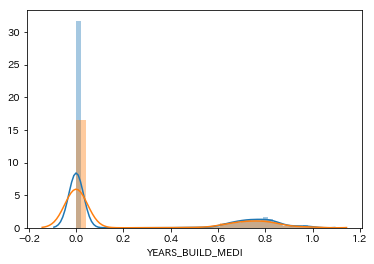

歪度 8.847128197225674
尖度 122.6311648301927


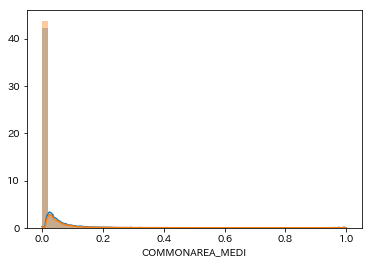

歪度 3.8749280157894495
尖度 19.456617379335285


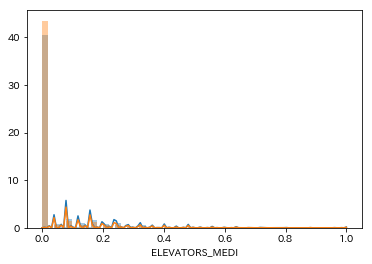

歪度 2.146431450113571
尖度 8.550089123458857


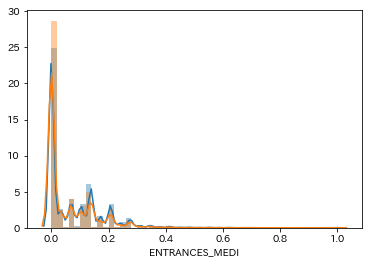

歪度 1.5304650598719391
尖度 2.5785214846271707


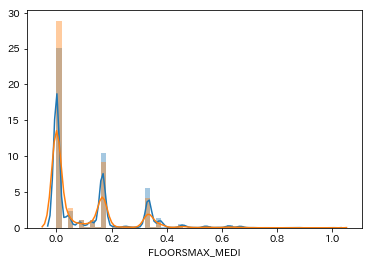

歪度 2.188844199977508
尖度 5.020129567933084


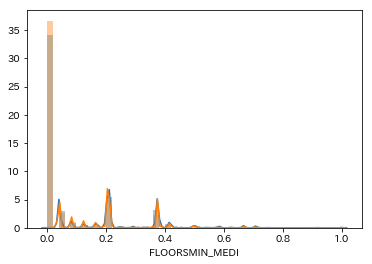

歪度 5.593451577442414
尖度 55.29740034891637


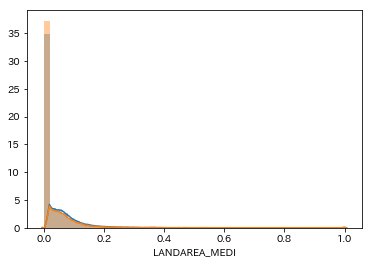

歪度 4.046773902771903
尖度 27.135580519334955


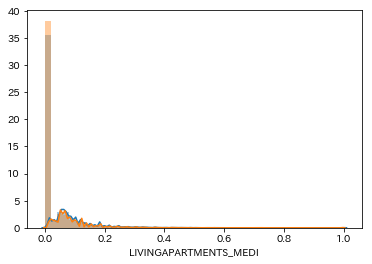

歪度 3.4252457672444843
尖度 17.62929648217906


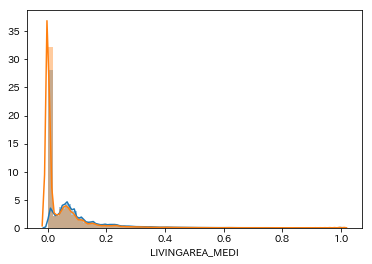

歪度 28.057902684299304
尖度 936.2141878260393


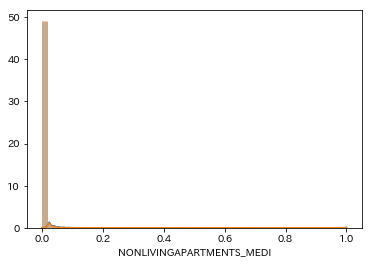

歪度 9.430768562038496
尖度 133.74388441125458


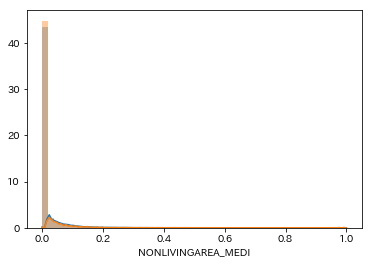

歪度 3.352632305446796
尖度 17.237328008062516


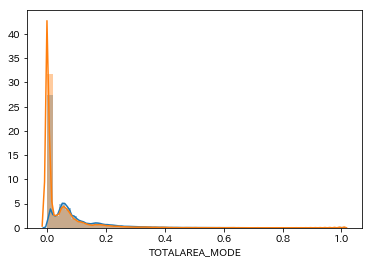

歪度 12.143737153313078
尖度 1426.312584355023


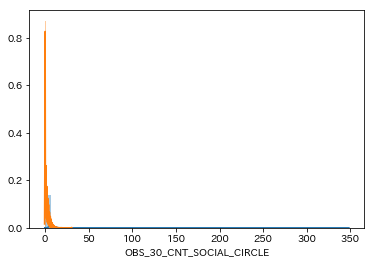

歪度 5.192547167041025
尖度 126.67456918955176


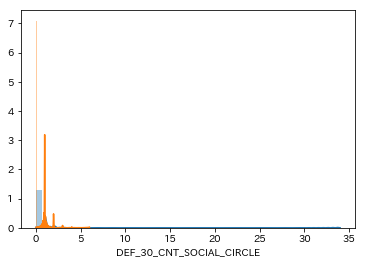

歪度 12.075093632950276
尖度 1411.2064510170785


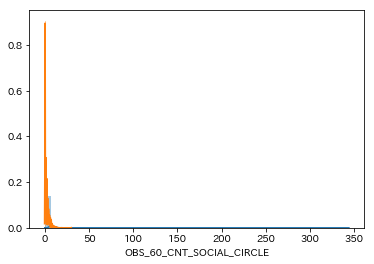

歪度 5.287313506185747
尖度 86.83372365948023


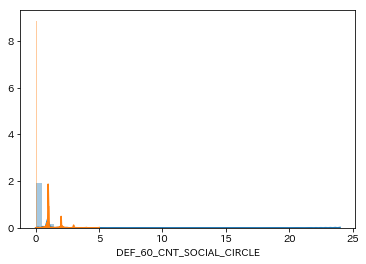

歪度 -0.7136048517941725
尖度 -0.3085926317109786


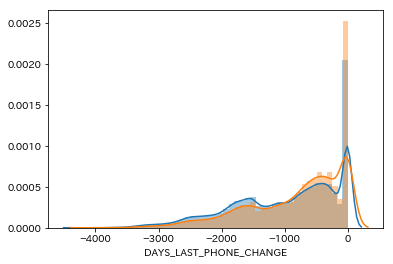

歪度 153.79106719822505
尖度 23649.692349969


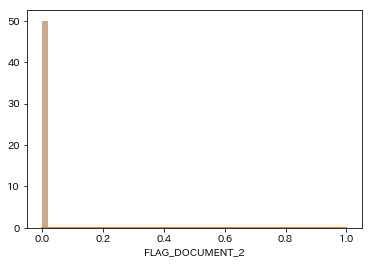

歪度 -0.9257203819650203
尖度 -1.1430417744145382


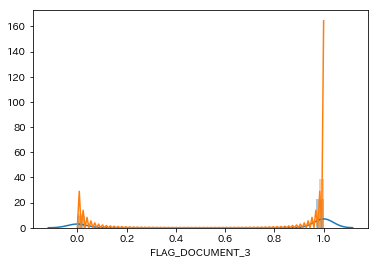

歪度 110.8938234587684
尖度 12295.440081304498


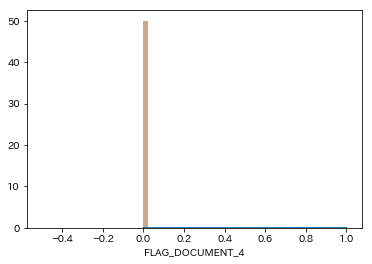

歪度 7.948282869496087
尖度 61.17520057352499


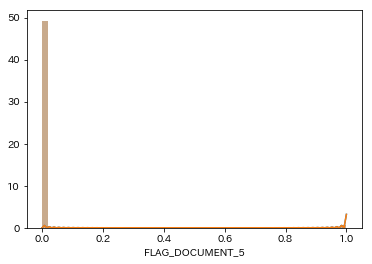

歪度 2.9074123349575802
尖度 6.453046485463483


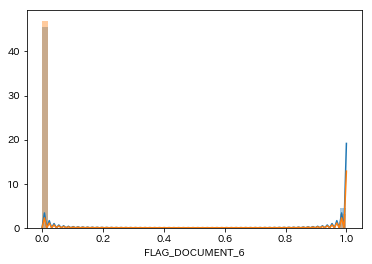

歪度 72.1737558906109
尖度 5207.051039357496


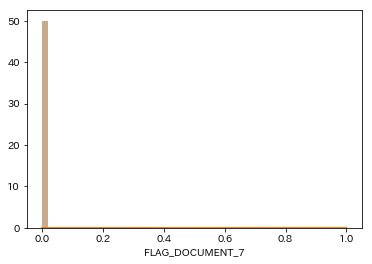

歪度 3.062225907774697
尖度 7.3772275102465645


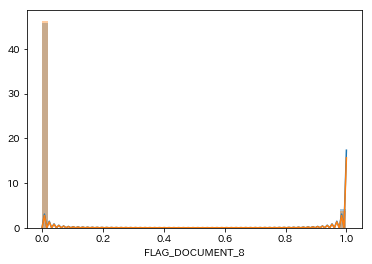

歪度 15.927676834031436
尖度 251.69088932934164


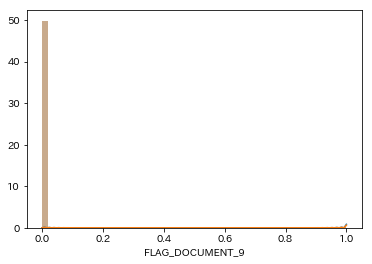

歪度 209.5880313374475
尖度 43925.14287990677


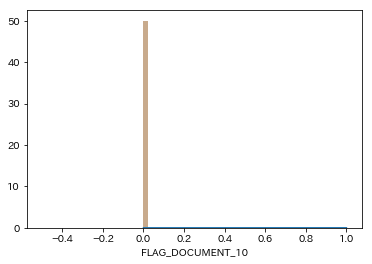

歪度 15.894151244882115
尖度 250.62404379518756


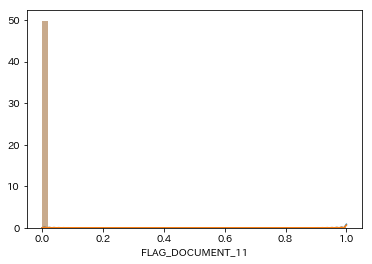

歪度 392.1128664128528
尖度 153750.5000065038


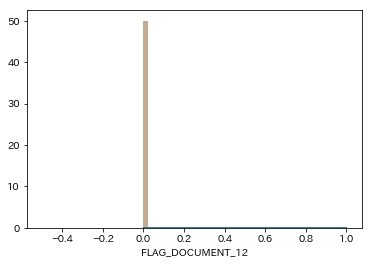

歪度 16.753664430942326
尖度 278.68527186462205


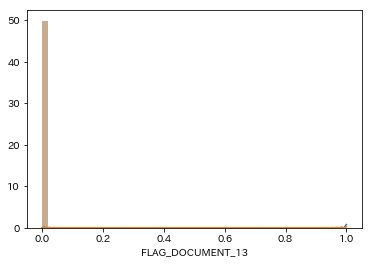

歪度 18.37244371898468
尖度 335.54668820726005


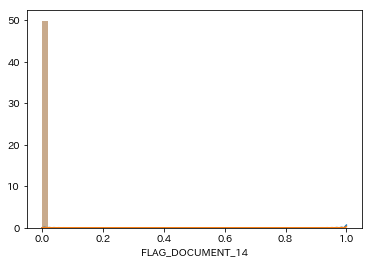

歪度 28.699193094863833
尖度 821.6436842962797


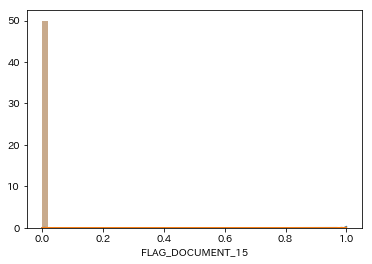

歪度 9.886062580978082
尖度 95.73423335501502


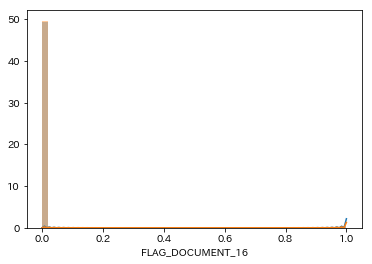

歪度 61.21384167873895
尖度 3745.134413069721


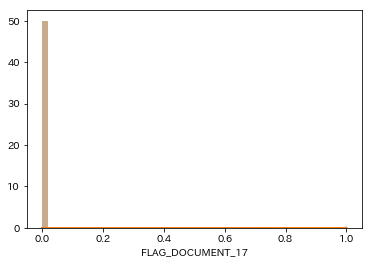

歪度 10.955026080557857
尖度 118.01259642570267


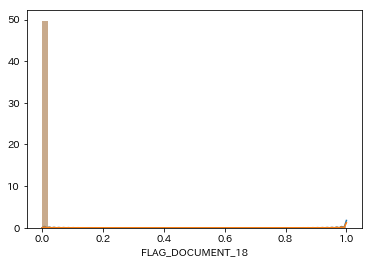

歪度 40.95593453453479
尖度 1675.3885735970978


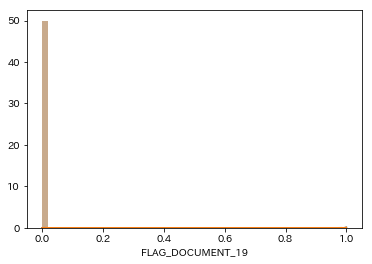

歪度 44.36468039477766
尖度 1966.2248665307686


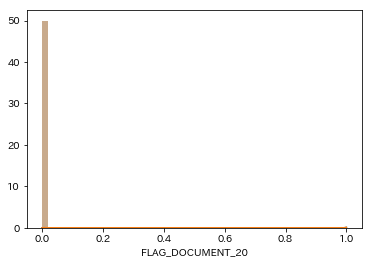

歪度 54.61267274525195
尖度 2980.5440243799817


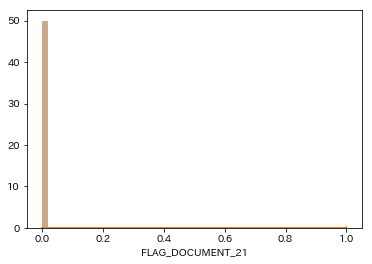

歪度 15.641913451778741
尖度 294.6164159767423


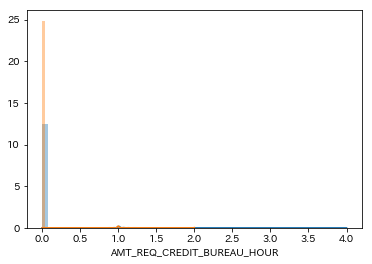

歪度 29.081435308395644
尖度 1331.7347006824143


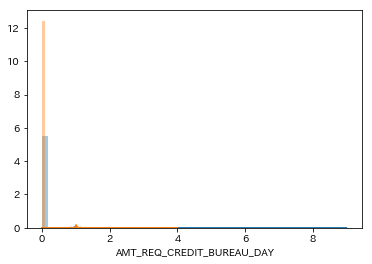

歪度 10.007983754347828
尖度 192.73076104820993


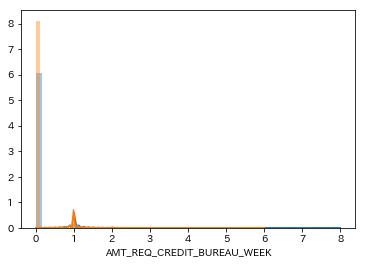

歪度 8.371463832617001
尖度 103.9754978320749


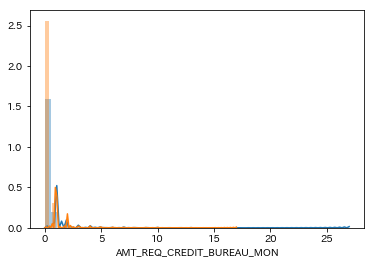

歪度 141.40022513900539
尖度 49065.20091712965


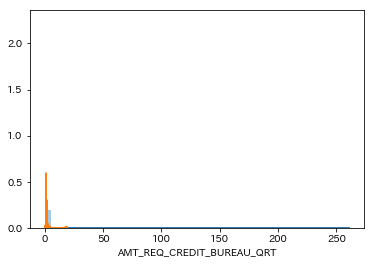

歪度 1.3717214741952637
尖度 2.2160394653921847


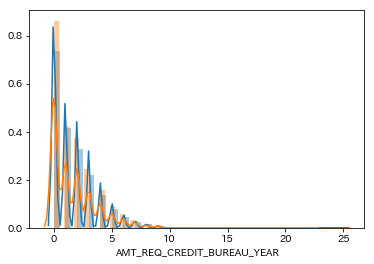

歪度 -2.75826320156654
尖度 5.6080158891160945


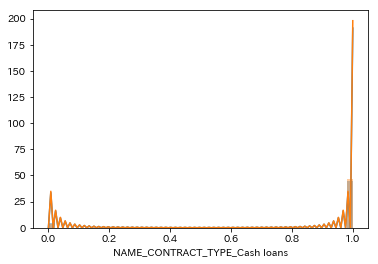

歪度 2.75826320156654
尖度 5.6080158891160945


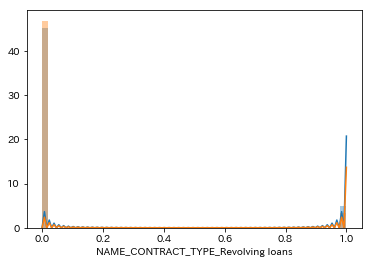

歪度 0.0
尖度 -3.0


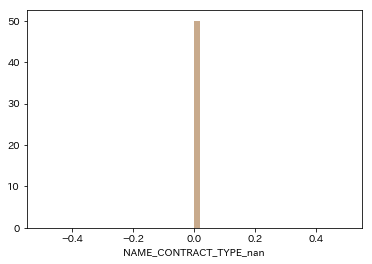

歪度 -0.6677446612504012
尖度 -1.5541170673715867


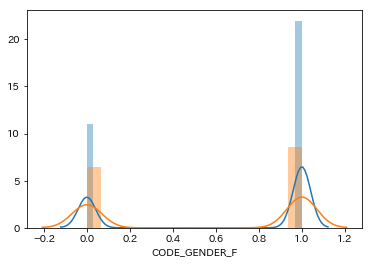

歪度 0.667805630709185
尖度 -1.5540356395931079


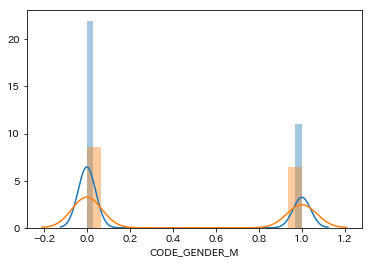

歪度 277.2629618485091
尖度 76872.75001300786


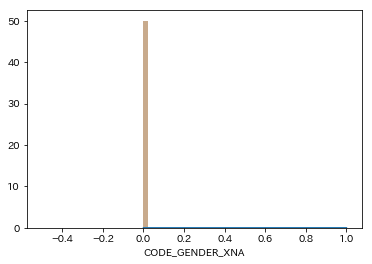

歪度 0.0
尖度 -3.0


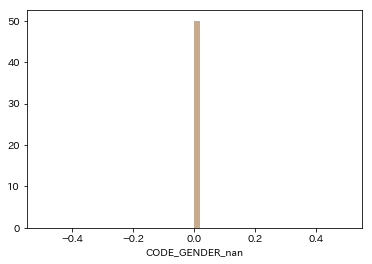

歪度 -0.6750118466283872
尖度 -1.544359006911336


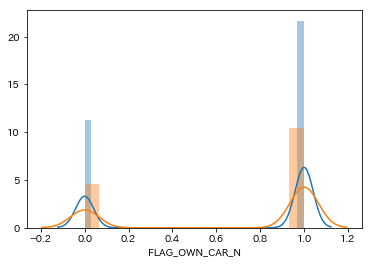

歪度 0.675011846628388
尖度 -1.5443590069113338


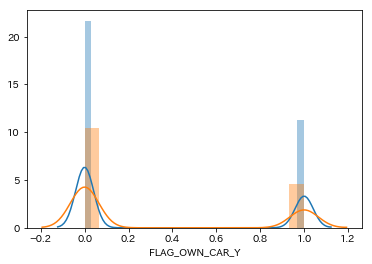

歪度 0.0
尖度 -3.0


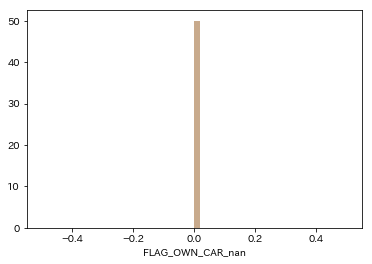

歪度 0.8402884091293922
尖度 -1.293915389482796


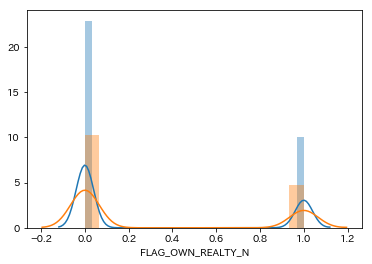

歪度 -0.840288409129392
尖度 -1.293915389482796


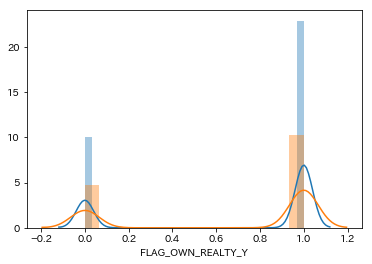

歪度 0.0
尖度 -3.0


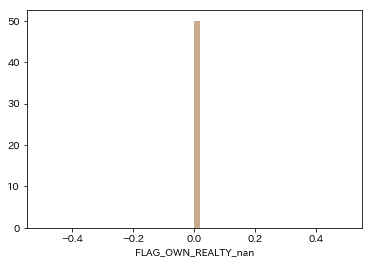

歪度 9.546578118030816
尖度 89.13715376366494


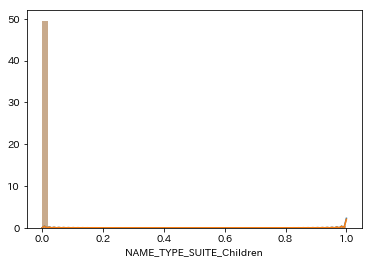

歪度 2.193037050298384
尖度 2.809411503981437


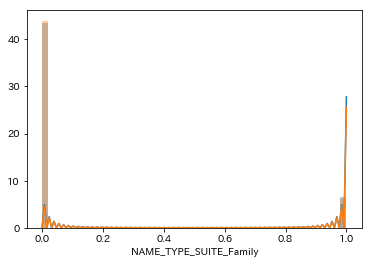

歪度 33.6411625737872
尖度 1129.727819315981


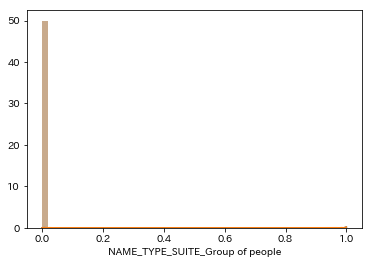

歪度 18.764230802243677
尖度 350.09635759987077


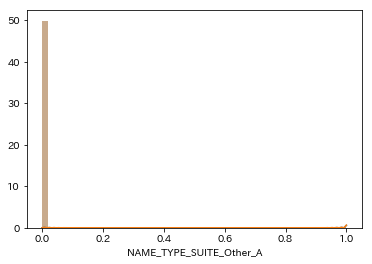

歪度 13.066782980609021
尖度 168.7408174623337


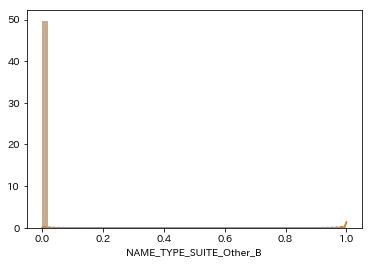

歪度 4.907567239751146
尖度 22.084216212678687


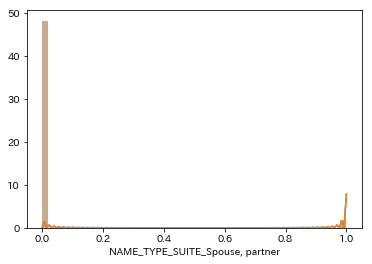

歪度 -1.5654761687518188
尖度 0.4507156349298733


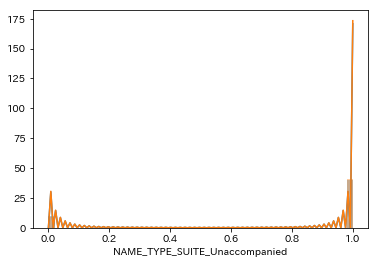

歪度 15.330225996694157
尖度 233.01582910971746


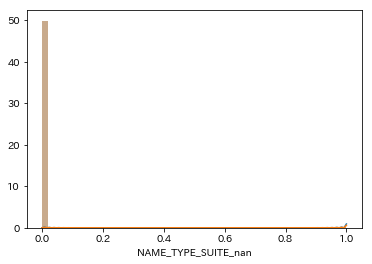

歪度 175.3513616500319
尖度 30746.100032520233


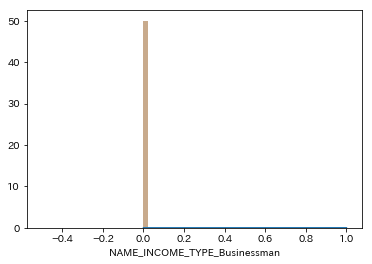

歪度 1.2638928399987908
尖度 -0.4025748889997902


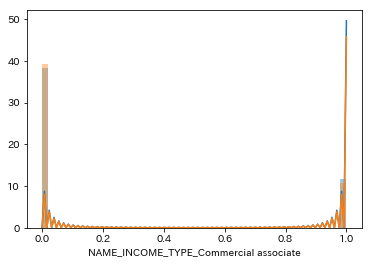

歪度 247.99032242460572
尖度 61497.20001625988


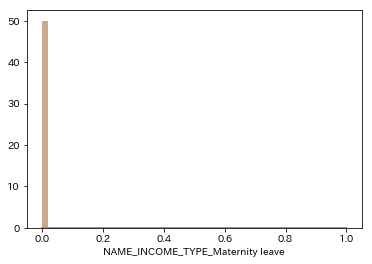

歪度 1.6655661827073716
尖度 0.7741107089784038


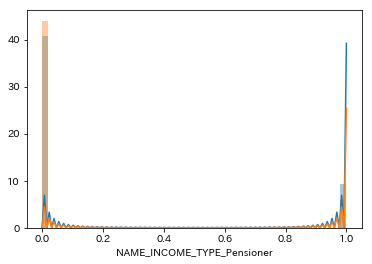

歪度 3.3533551202466647
尖度 9.244990562484537


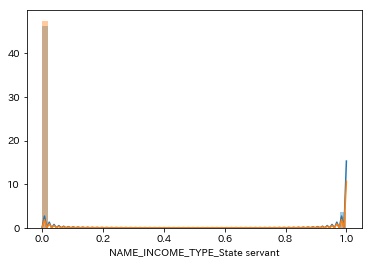

歪度 130.6940874828787
尖度 17078.944502982347


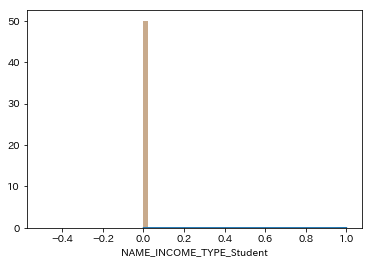

歪度 118.21494321286117
尖度 13972.77279881999


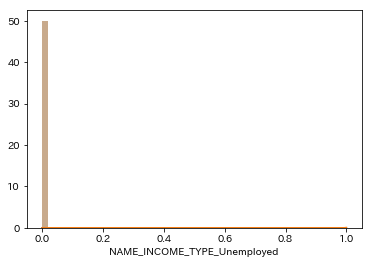

歪度 -0.06531376544887953
尖度 -1.9957341120428886


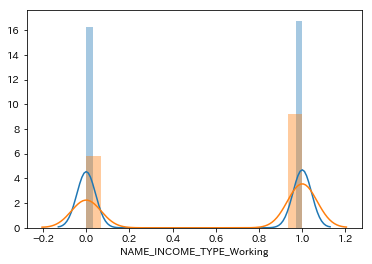

歪度 0.0
尖度 -3.0


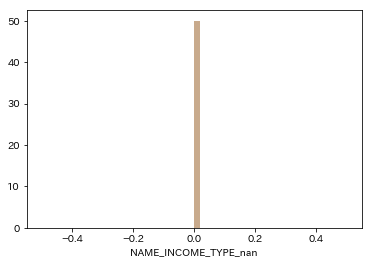

歪度 43.26739657952118
尖度 1870.067606769563


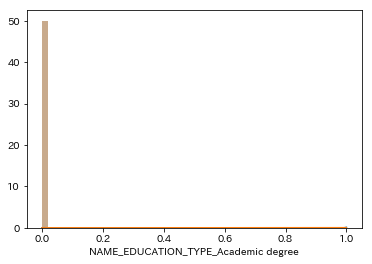

歪度 1.1955904548067413
尖度 -0.5705634643750082


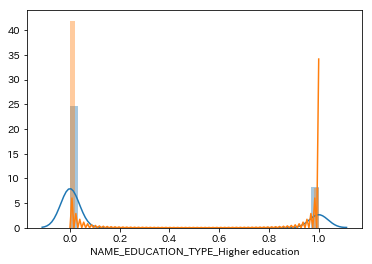

歪度 5.191996632152556
尖度 24.956829028283515


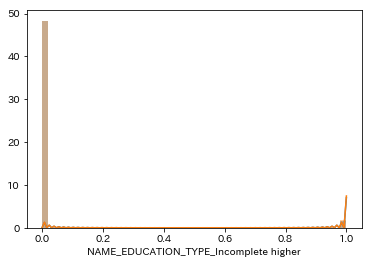

歪度 8.808927791963113
尖度 75.59720884402017


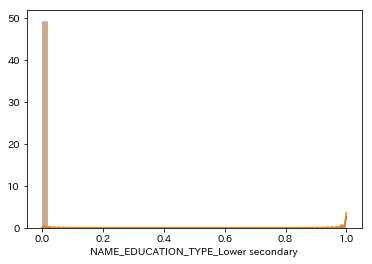

歪度 -0.9266082252865276
尖度 -1.1413971968313523


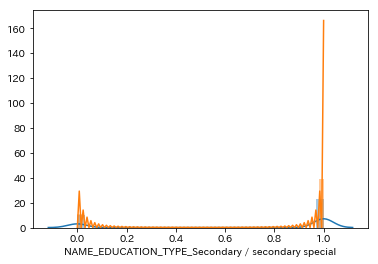

歪度 0.0
尖度 -3.0


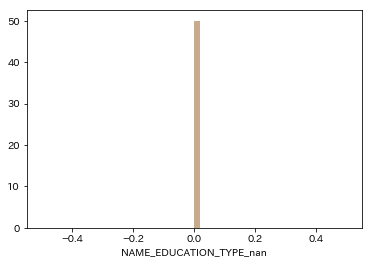

歪度 2.7267254135031647
尖度 5.435031480644005


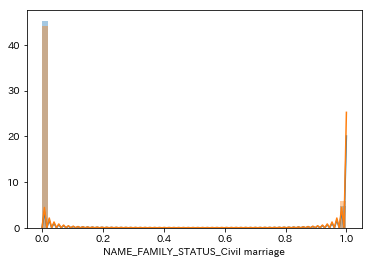

歪度 -0.5778254822928549
尖度 -1.6661177120130306


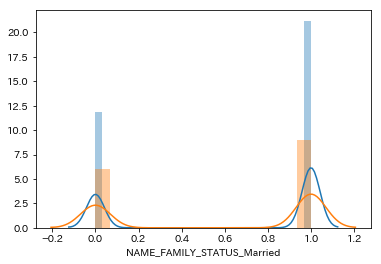

歪度 3.5529049410735616
尖度 10.62313352030493


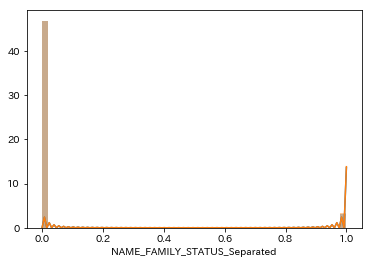

歪度 1.9849982210944845
尖度 1.9402179377482653


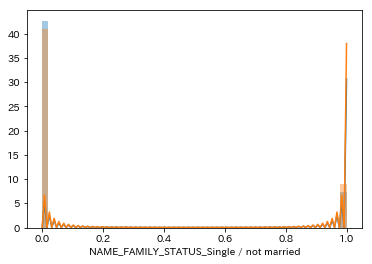

歪度 392.1128664128526
尖度 153750.50000650375


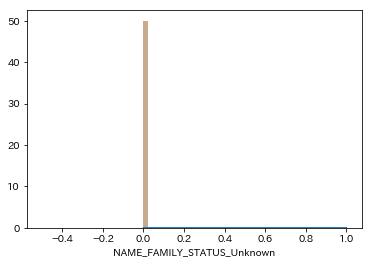

歪度 4.021133394771818
尖度 14.169513778549135


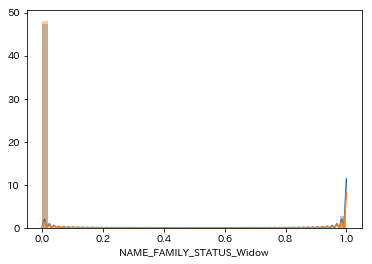

歪度 0.0
尖度 -3.0


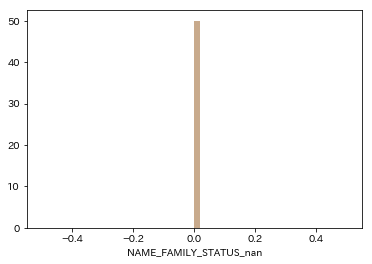

歪度 16.46443552193419
尖度 269.07763705592816


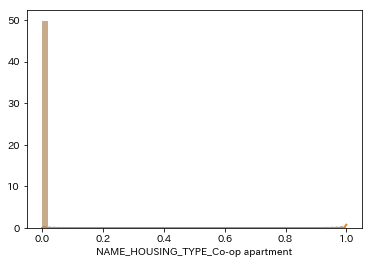

歪度 -2.450209869324922
尖度 4.00352840373725


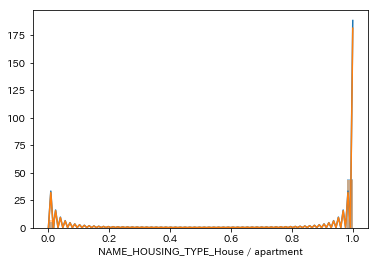

歪度 4.953364111989049
尖度 22.53581602594104


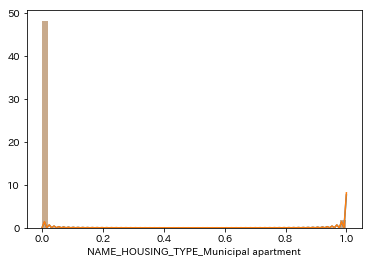

歪度 10.701109376576166
尖度 112.51374188944624


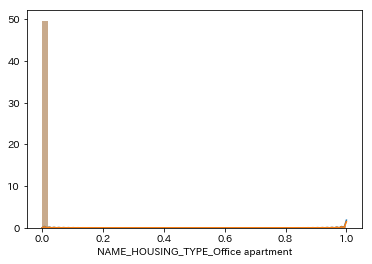

歪度 7.747113502091497
尖度 58.01776761428835


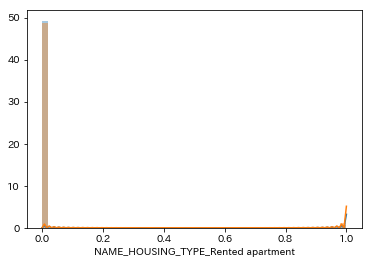

歪度 4.2157408480871625
尖度 15.772470898230662


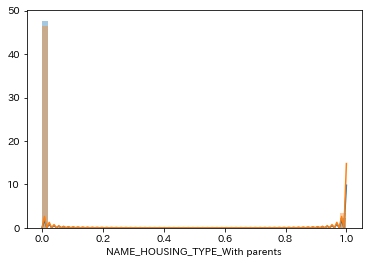

歪度 0.0
尖度 -3.0


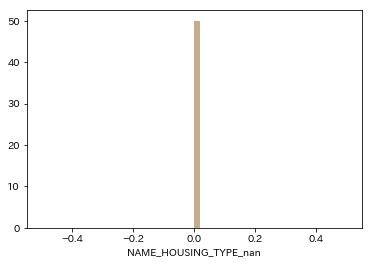

歪度 5.326355862823558
尖度 26.370066777434893


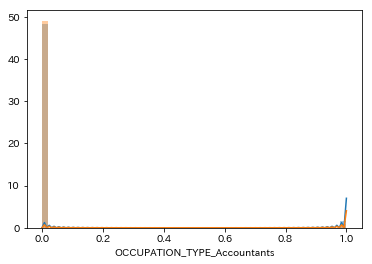

歪度 7.9438103939851805
尖度 61.10412357558707


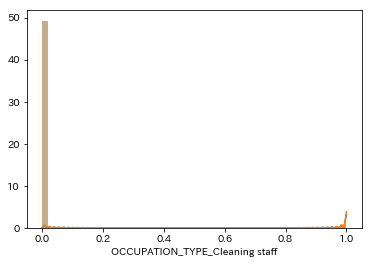

歪度 6.981189445644507
尖度 46.7370060759783


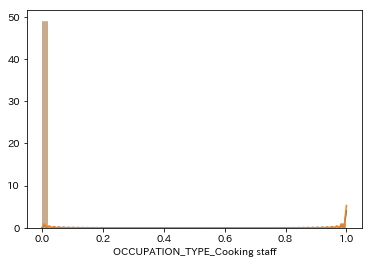

歪度 2.8726837036227644
尖度 6.252311661059803


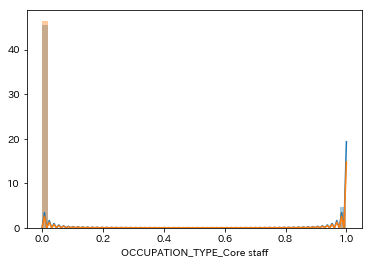

歪度 3.687082050086909
尖度 11.594574044073086


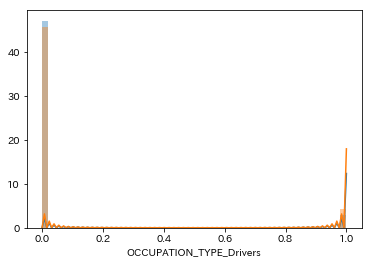

歪度 23.30670600206027
尖度 541.2025446664722


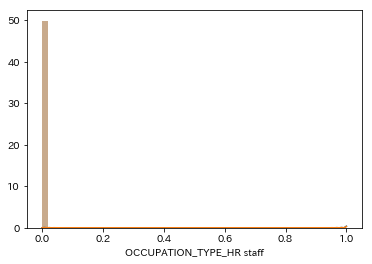

歪度 4.90514884356835
尖度 22.060485177559908


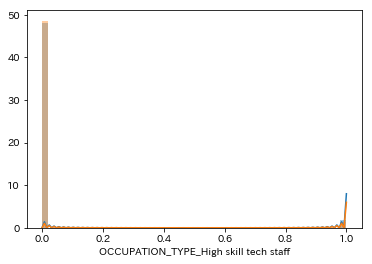

歪度 24.116869333364363
尖度 579.6233864425695


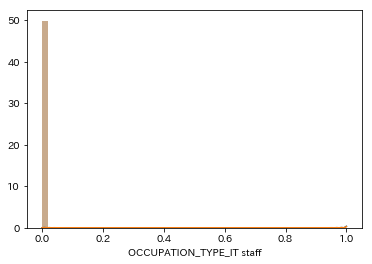

歪度 1.6706210527358034
尖度 0.7909747018440836


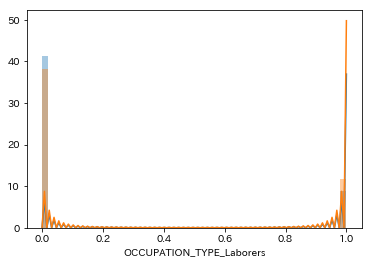

歪度 11.997099966633492
尖度 141.9304076093975


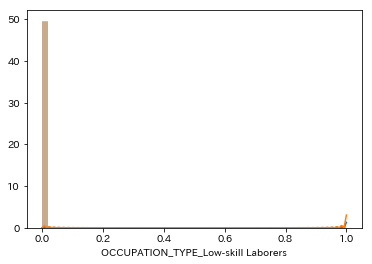

歪度 3.385832166367223
尖度 9.463859458806962


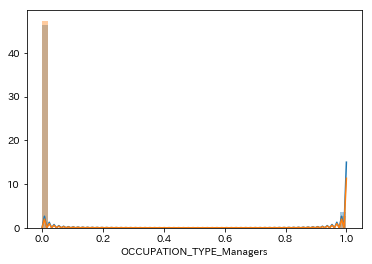

歪度 5.748871356662449
尖度 31.04952187545399


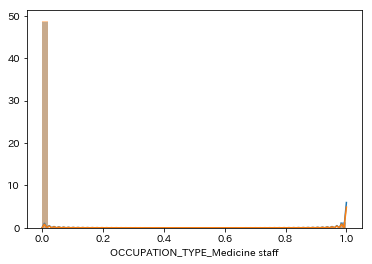

歪度 10.62840877840306
尖度 110.96307316083534


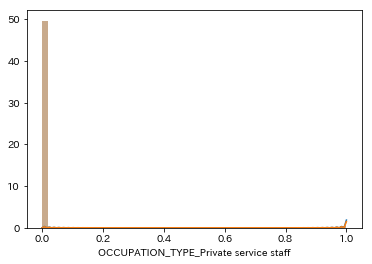

歪度 20.161129843259378
尖度 404.47115655676384


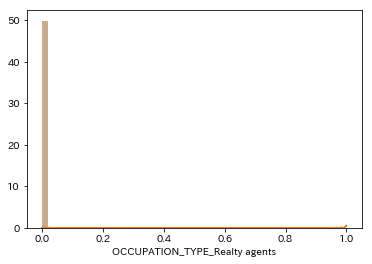

歪度 2.58761401385166
尖度 4.695746284681506


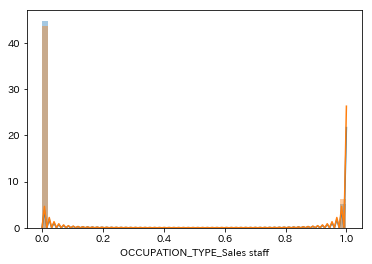

歪度 15.252700576082345
尖度 230.64487486362282


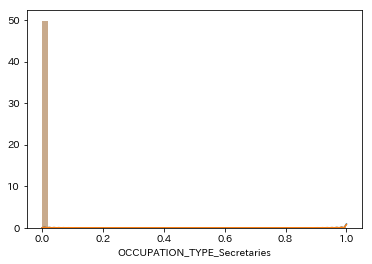

歪度 6.5403441327083085
尖度 40.77610137425196


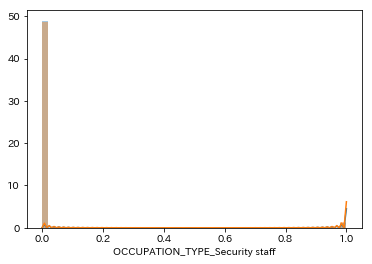

歪度 15.004275728064568
尖度 223.12829012378748


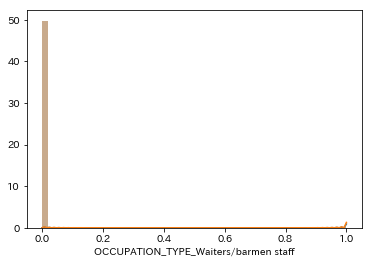

歪度 0.8042485316751299
尖度 -1.3531842992983971


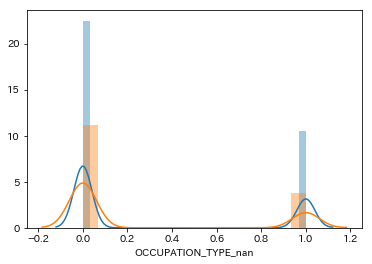

歪度 1.8178722783070067
尖度 1.304659620237107


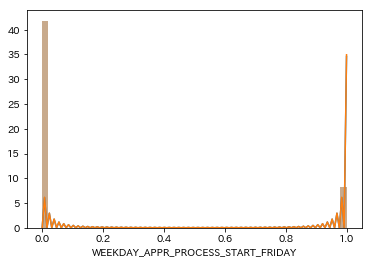

歪度 1.8058566042645599
尖度 1.2611180751659266


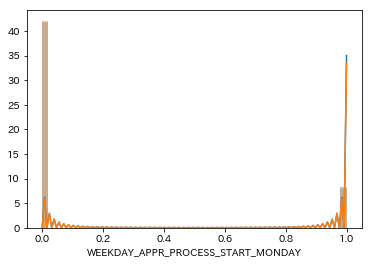

歪度 2.4915225497437405
尖度 4.2076846158815515


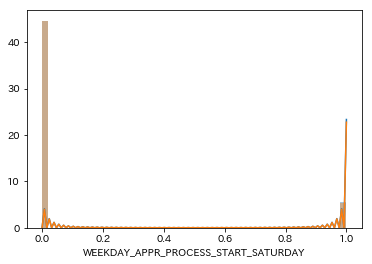

歪度 4.007491919967721
尖度 14.059991488606574


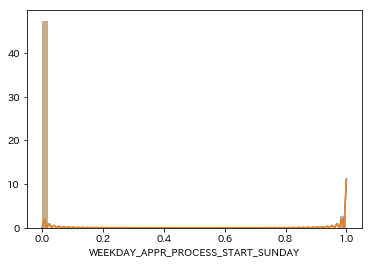

歪度 1.80977541696646
尖度 1.275287059856126


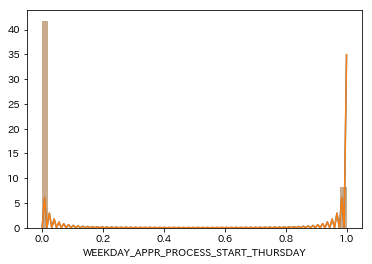

歪度 1.7081108004450019
尖度 0.9176425065968661


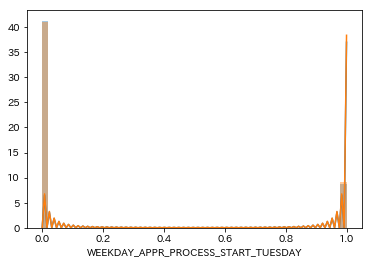

歪度 1.7675948008785412
尖度 1.1243913800928498


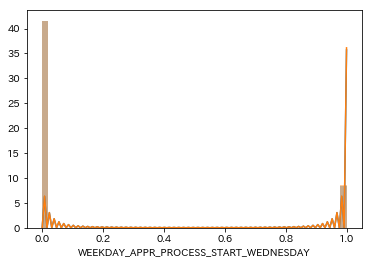

歪度 0.0
尖度 -3.0


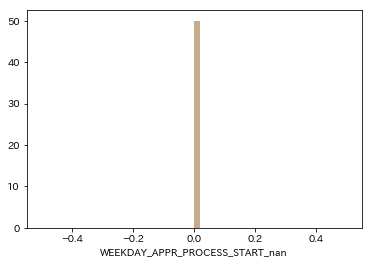

歪度 26.71722767859437
尖度 711.8102548298485


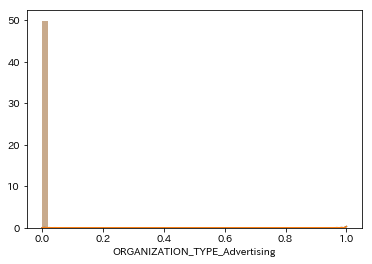

歪度 11.059753629612644
尖度 120.31815034773011


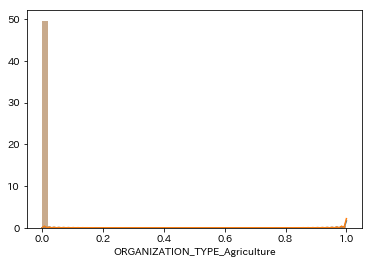

歪度 10.939340423726495
尖度 117.66916890617654


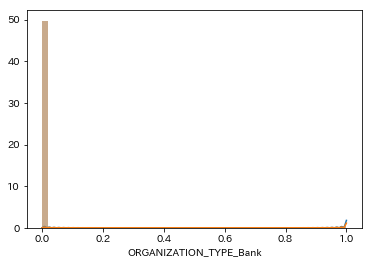

歪度 6.9576372406983165
尖度 46.40871597315213


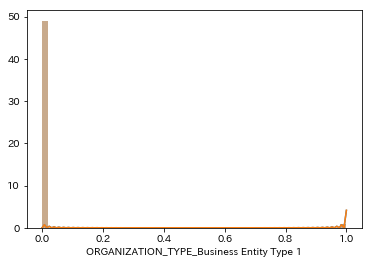

歪度 5.116171706804507
尖度 24.17521293350693


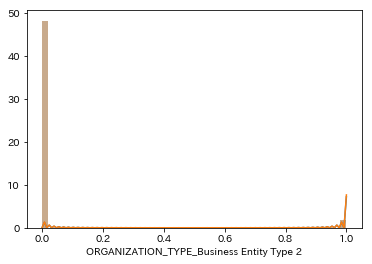

歪度 1.3441062448385288
尖度 -0.19337840258607075


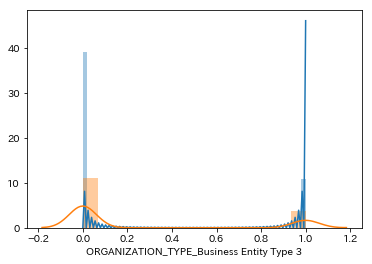

歪度 34.34727735350061
尖度 1177.7354615982968


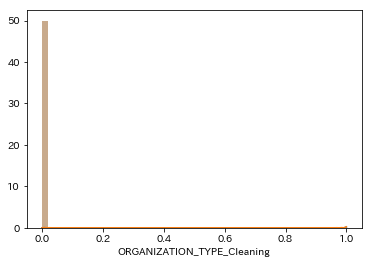

歪度 6.540344132708311
尖度 40.77610137425197


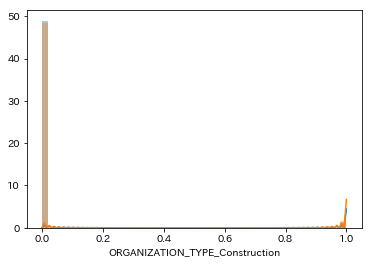

歪度 28.431952169729822
尖度 806.3759041818048


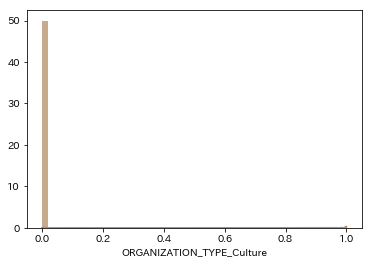

歪度 17.908067689383536
尖度 318.6988883675426


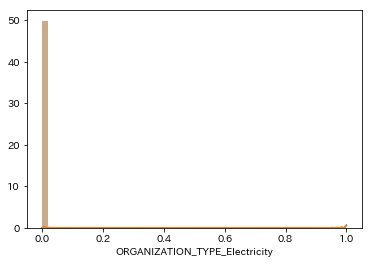

歪度 23.369394731351328
尖度 544.1286101097105


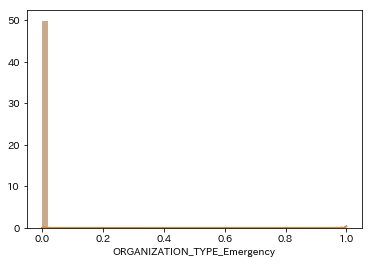

歪度 5.156744612248889
尖度 24.592014995957943


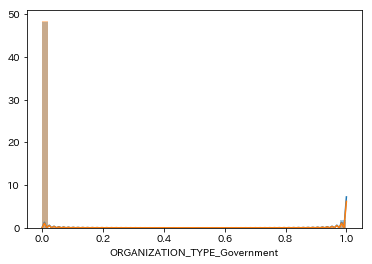

歪度 17.757745346193182
尖度 313.33751978024515


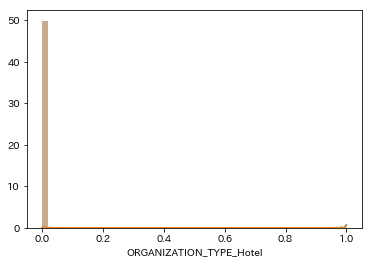

歪度 10.048323570506735
尖度 98.96880657760113


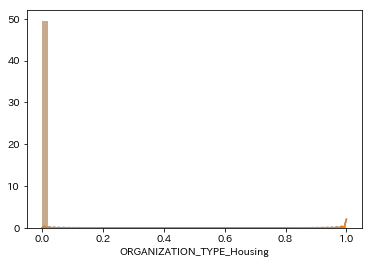

歪度 17.116414019489152
尖度 290.97162888656453


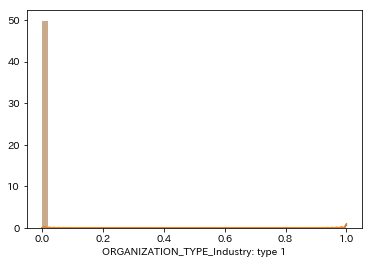

歪度 53.08674212500648
尖度 2816.2021894469362


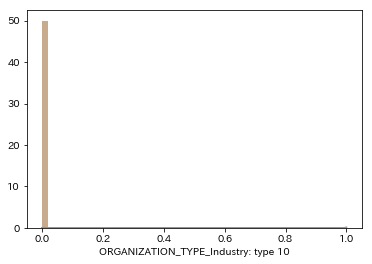

歪度 10.52299165807245
尖度 108.73335343586226


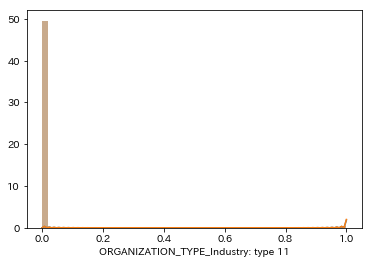

歪度 28.816043188302917
尖度 828.3643450301389


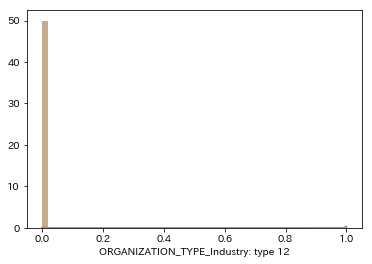

歪度 67.72530277404682
尖度 4584.716635836315


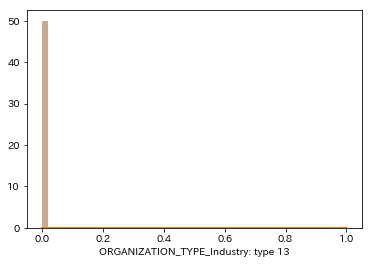

歪度 25.8538757051836
尖度 666.4228889790828


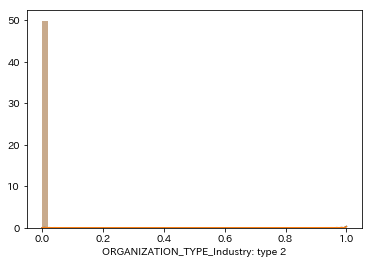

歪度 9.530022552603972
尖度 88.82132985314045


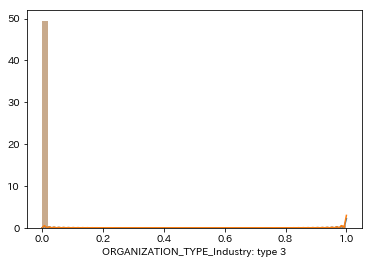

歪度 18.645174732810386
尖度 345.6425408170307


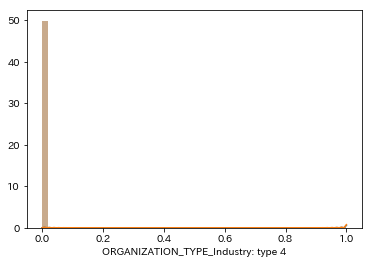

歪度 22.591500797729957
尖度 508.37590829383333


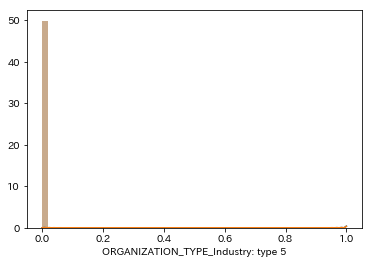

歪度 52.370166057773176
尖度 2740.63429291874


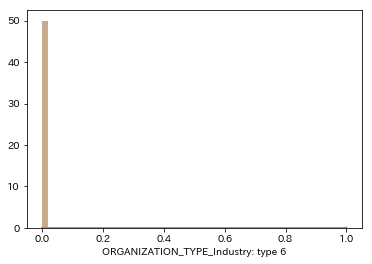

歪度 15.240875926293421
尖度 230.28429900067027


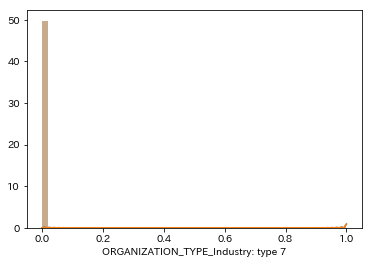

歪度 113.18108680952584
尖度 12807.958411385422


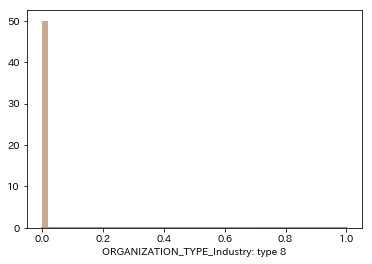

歪度 9.397596226215336
尖度 86.31481483097673


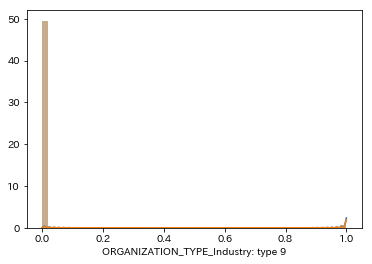

歪度 22.629532640232906
尖度 510.09574751536695


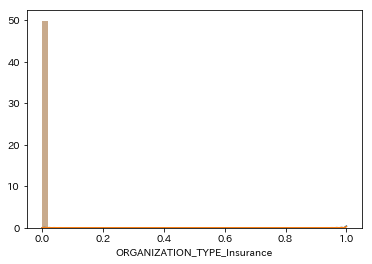

歪度 6.459044161267447
尖度 39.71925147720306


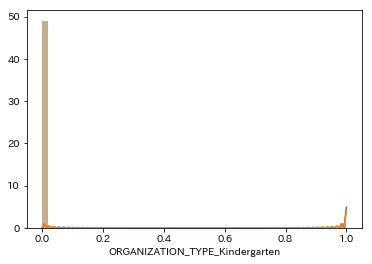

歪度 31.70542192913377
尖度 1003.2337797043982


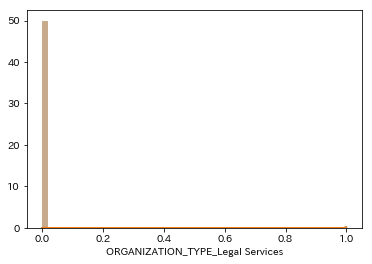

歪度 4.9508871768291165
尖度 22.51128383769098


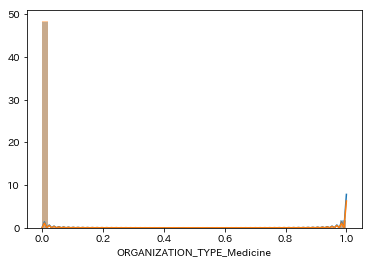

歪度 10.665618243617605
尖度 111.7554125185887


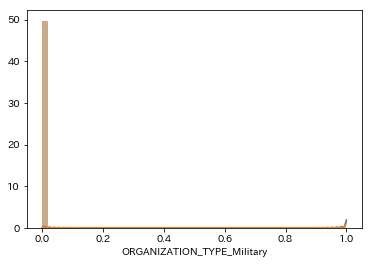

歪度 31.09770534907648
尖度 965.067277977979


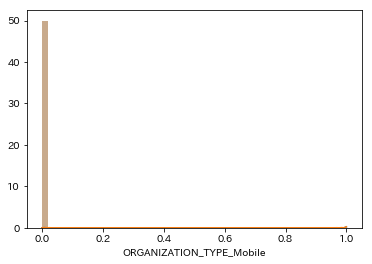

歪度 3.935728631209886
尖度 13.489959858525243


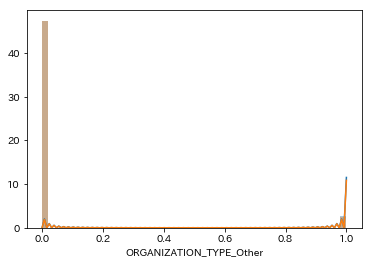

歪度 11.329893739606797
尖度 126.36649215078134


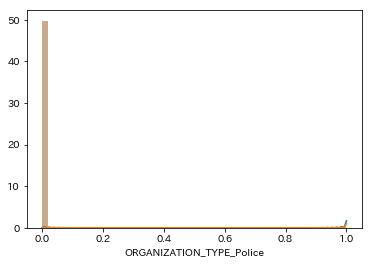

歪度 11.814028672838713
尖度 137.57127348265524


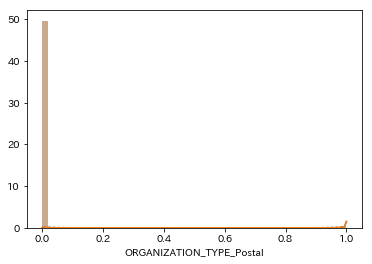

歪度 27.812662920191624
尖度 771.5442187122022


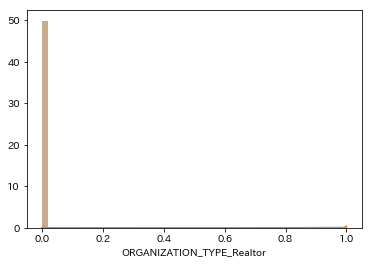

歪度 60.12301345639237
尖度 3612.7767470775407


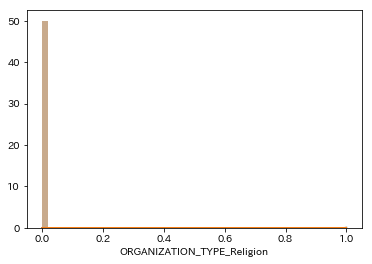

歪度 12.915405184823749
尖度 164.80769108817233


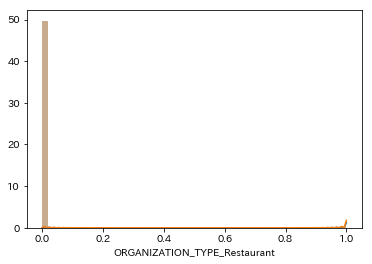

歪度 5.622168197165305
尖度 29.60877523721694


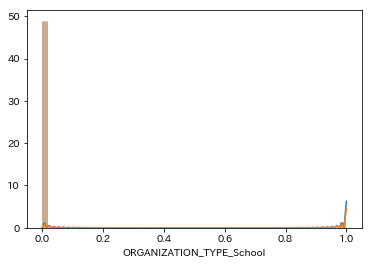

歪度 9.576892083713737
尖度 89.716861983099


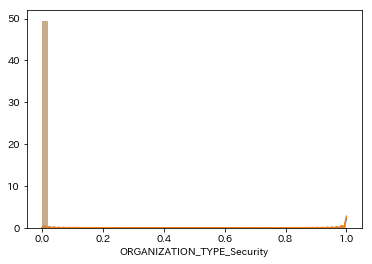

歪度 12.360708280093219
尖度 150.787109185565


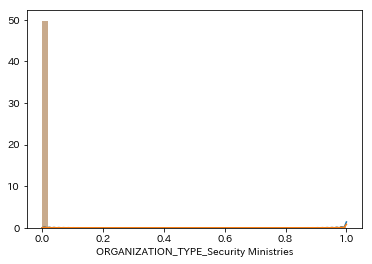

歪度 2.2689954196885895
尖度 3.1483402145677992


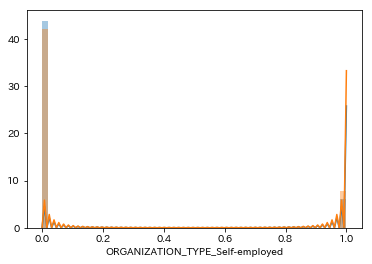

歪度 13.865432827742412
尖度 190.25022750063718


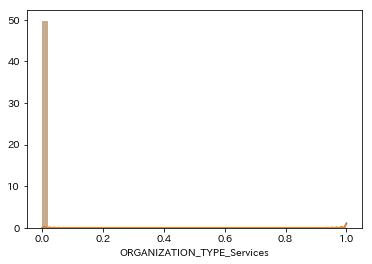

歪度 23.020640451894053
尖度 527.9498868153806


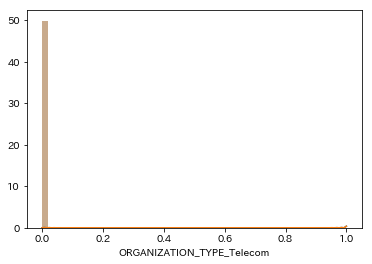

歪度 29.6758054953784
尖度 878.6534317995304


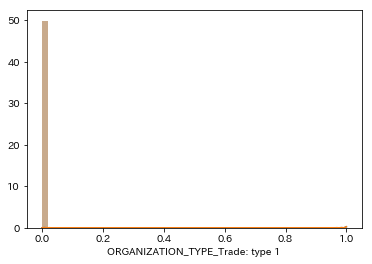

歪度 12.603734041566724
尖度 156.85411179054776


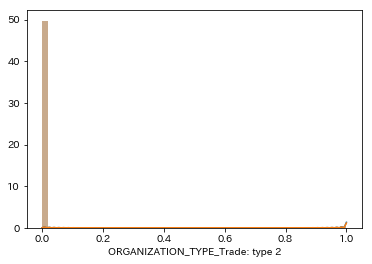

歪度 9.223505593074822
尖度 83.07305542548255


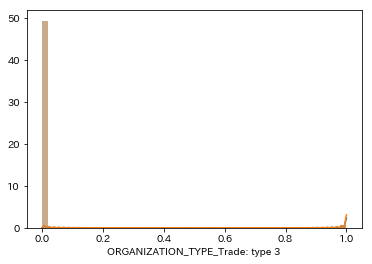

歪度 69.29545138871649
尖度 4799.859583165962


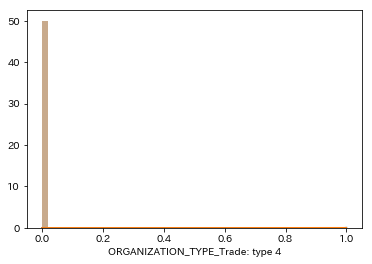

歪度 79.20059881873897
尖度 6270.734853246838


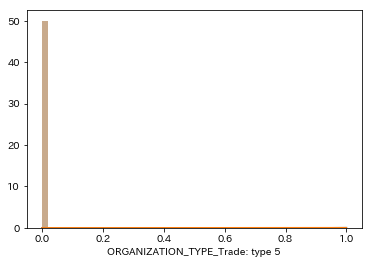

歪度 22.00775318822532
尖度 482.3412003938415


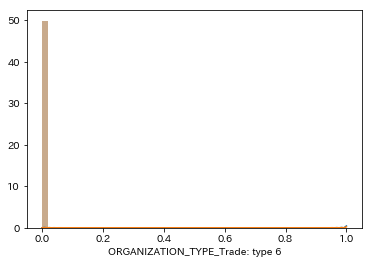

歪度 6.024495961253459
尖度 34.294551587159255


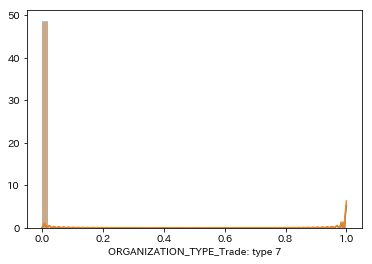

歪度 39.07564620962123
尖度 1524.9061266994872


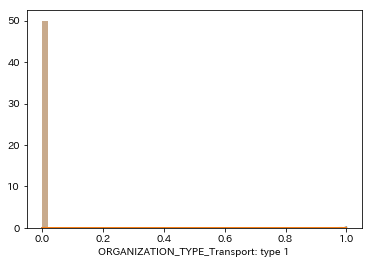

歪度 11.68465943663488
尖度 134.53126615014042


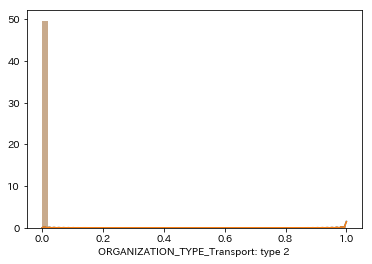

歪度 16.00217444164171
尖度 254.0695868607312


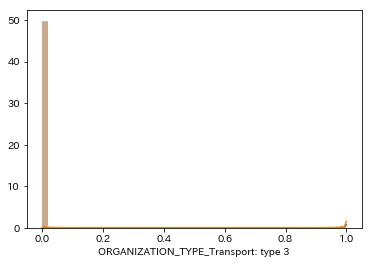

歪度 7.347479028351896
尖度 51.9854480720709


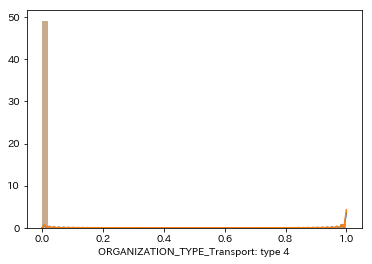

歪度 15.124097342678448
尖度 226.7383204308135


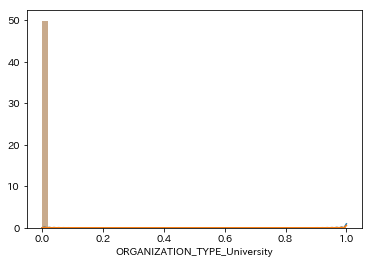

歪度 1.6652222179587213
尖度 0.7729650351833652


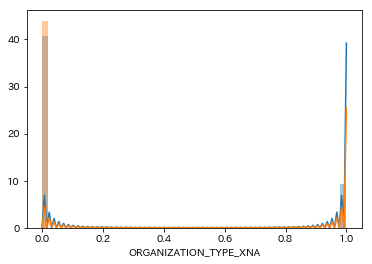

歪度 0.0
尖度 -3.0


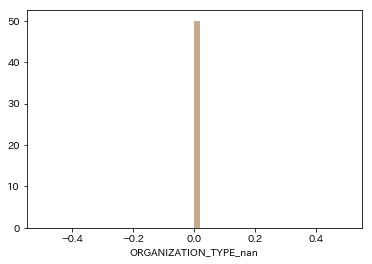

歪度 7.147829312148195
尖度 49.09146387560492


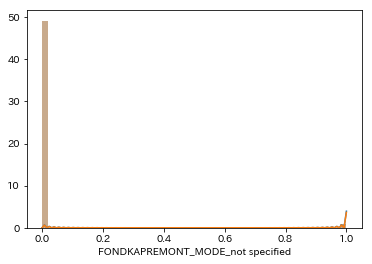

歪度 7.193442173455866
尖度 49.74561030285341


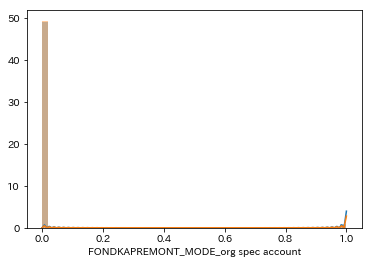

歪度 1.2169905951782334
尖度 -0.5189338912477299


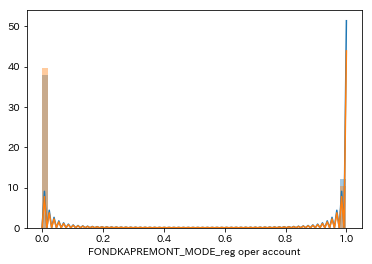

歪度 4.743110585015843
尖度 20.497098021689308


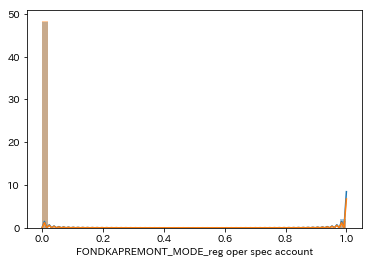

歪度 -0.7908581814977507
尖度 -1.3745433367580708


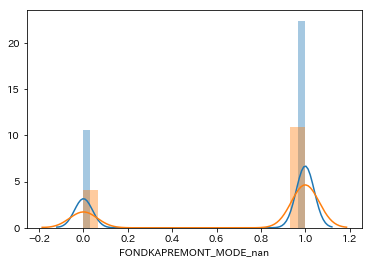

歪度 0.04231689868786889
尖度 -1.99820928008544


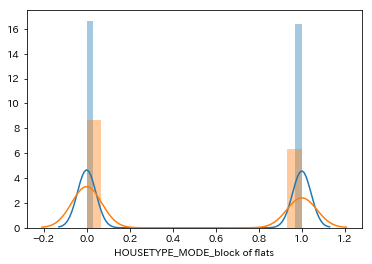

歪度 14.217911047856326
尖度 200.14899456475496


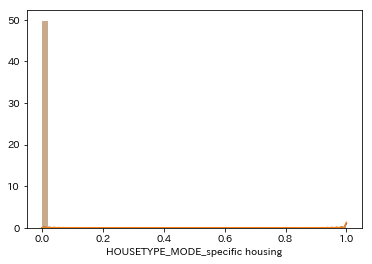

歪度 15.834326765373792
尖度 248.72590411263315


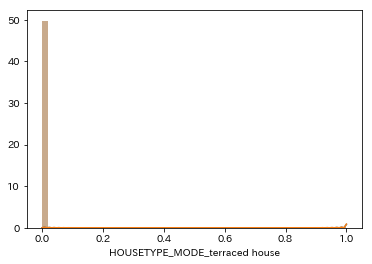

歪度 -0.007043694153535783
尖度 -1.9999503863726715


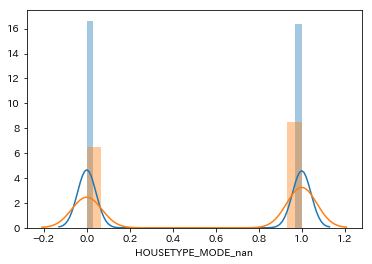

歪度 5.501334149675823
尖度 28.26467742638939


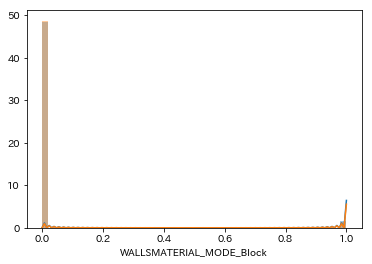

歪度 11.442940397266673
尖度 128.94088493539783


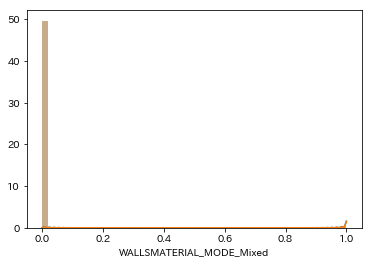

歪度 13.033108522286504
尖度 167.86191775369724


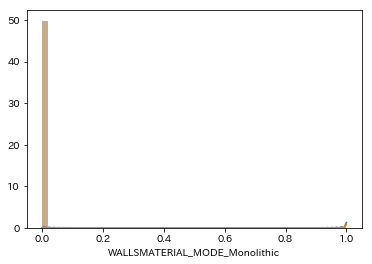

歪度 13.647082138618414
尖度 184.2428508981979


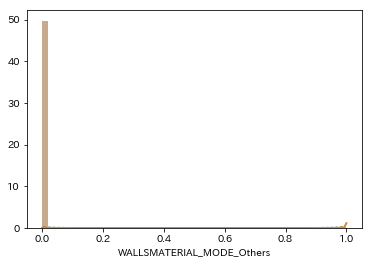

歪度 1.3892177266624395
尖度 -0.07007410792684432


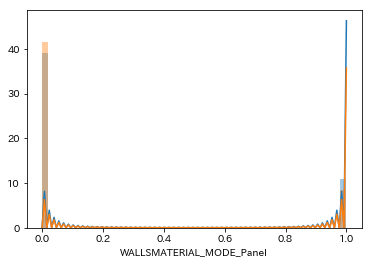

歪度 1.4182751393728334
尖度 0.011504370963028254


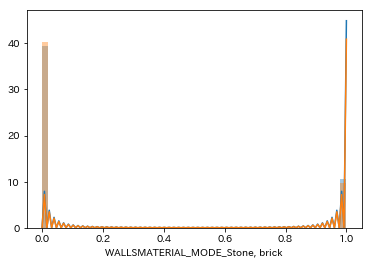

歪度 7.37345252650202
尖度 52.36780216057904


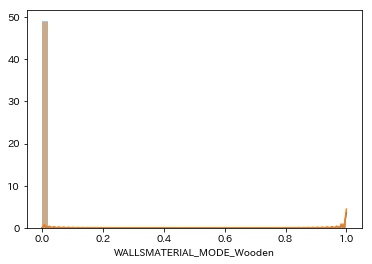

歪度 -0.033636073165158716
尖度 -1.9988686145820276


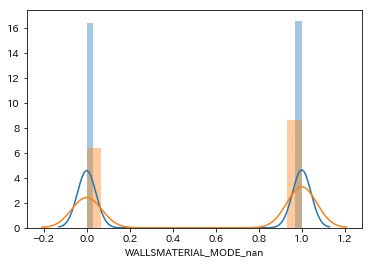

歪度 -0.07383624448268795
尖度 -1.994548209000693


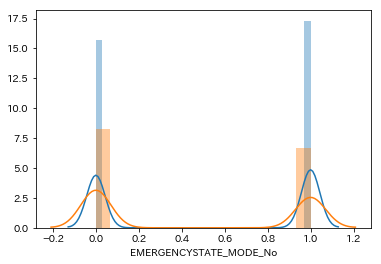

歪度 11.362217308335959
尖度 127.09998216184911


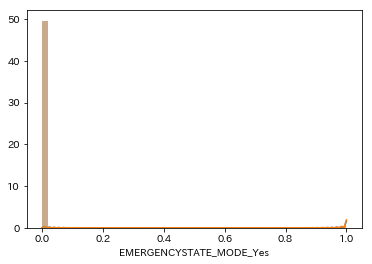

歪度 0.10420899196045481
尖度 -1.9891404859945845


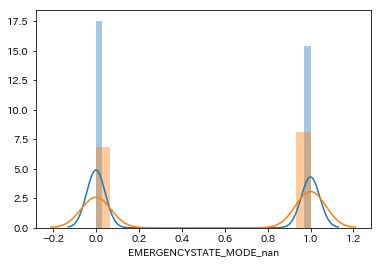

In [42]:
import itertools
import scipy
df_columns_list = list(df_columns)
for feature in df_columns_list:
    sns.distplot(df_dummies[df_dummies["TARGET"]==0][feature])
    sns.distplot(df_dummies[df_dummies["TARGET"]==1][feature])
    print("歪度",scipy.stats.skew(df_dummies[feature]))
    print("尖度",scipy.stats.kurtosis(df_dummies[feature]))
    plt.show()
    


In [38]:
df_columns_list

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

考察　  
DAYS_BIRTHは高年齢の方がデフォルト率が高いので年寄りは金銭的に困りやすいという事だろうという予測が、下記のグラフで雇用と年齢のプロットで分かる。
EXT_SOURCE_3は外部データであるがこれが高い方がデフォルト率が低いので信用指数になるデータだと思われる

/anaconda3/envs/DIC/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


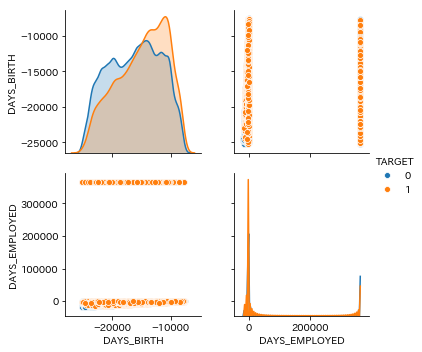

In [43]:
sns.pairplot(df_dummies, hue='TARGET',vars=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [44]:
df['DAYS_EMPLOYED']#を見ると365243と定数があるこれは失業中を示すと思われる上図、高年齢のものが失業中であることがわかる

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
30         -2668
31         -1104
32         -4404
33         -2060
34         -4585
35         -1275
36          -768
37         -1288
38        365243
39         -1761
40         -1262
41          -475
42         -3597
43        365243
44          -758
45          -895
46        365243
47         -5332
48         -4411
49         -9523
50         -1176
51         -6977
52          -778
53         -1392
54        365243
55         -4106
56        365243
57         -2351
58         -17